# Candlestick

In [2]:
pattern_funcs = [
    ("Two Crows", talib.CDL2CROWS),
    ("Three Black Crows", talib.CDL3BLACKCROWS),
    ("Three Inside Up/Down", talib.CDL3INSIDE),
    ("Three-Line Strike", talib.CDL3LINESTRIKE),
    ("Three Outside Up/Down", talib.CDL3OUTSIDE),
    ("Three Stars In The South", talib.CDL3STARSINSOUTH),
    ("Three Advancing White Soldiers", talib.CDL3WHITESOLDIERS),
    ("Abandoned Baby", talib.CDLABANDONEDBABY),
    ("Advance Block", talib.CDLADVANCEBLOCK),
    ("Belt-hold", talib.CDLBELTHOLD),
    ("Breakaway", talib.CDLBREAKAWAY),
    ("Closing Marubozu", talib.CDLCLOSINGMARUBOZU),
    ("Concealing Baby Swallow", talib.CDLCONCEALBABYSWALL),
    ("Counterattack", talib.CDLCOUNTERATTACK),
    ("Dark Cloud Cover", talib.CDLDARKCLOUDCOVER),
    ("Doji", talib.CDLDOJI),
    ("Doji Star", talib.CDLDOJISTAR),
    ("Dragonfly Doji", talib.CDLDRAGONFLYDOJI),
    ("Engulfing Pattern", talib.CDLENGULFING),
    ("Evening Doji Star", talib.CDLEVENINGDOJISTAR),
    ("Evening Star", talib.CDLEVENINGSTAR),
    ("Up/Down-gap side-by-side white lines", talib.CDLGAPSIDESIDEWHITE),
    ("Gravestone Doji", talib.CDLGRAVESTONEDOJI),
    ("Hammer", talib.CDLHAMMER),
    ("Hanging Man", talib.CDLHANGINGMAN),
    ("Harami Pattern", talib.CDLHARAMI),
    ("Harami Cross Pattern", talib.CDLHARAMICROSS),
    ("High-Wave Candle", talib.CDLHIGHWAVE),
    ("Hikkake Pattern", talib.CDLHIKKAKE),
    ("Modified Hikkake Pattern", talib.CDLHIKKAKEMOD),
    ("Homing Pigeon", talib.CDLHOMINGPIGEON),
    ("Identical Three Crows", talib.CDLIDENTICAL3CROWS),
    ("In-Neck Pattern", talib.CDLINNECK),
    ("Inverted Hammer", talib.CDLINVERTEDHAMMER),
    ("Kicking", talib.CDLKICKING),
    ("Kicking - bull/bear determined by the longer marubozu", talib.CDLKICKINGBYLENGTH),
    ("Ladder Bottom", talib.CDLLADDERBOTTOM),
    ("Long Legged Doji", talib.CDLLONGLEGGEDDOJI),
    ("Long Line Candle", talib.CDLLONGLINE),
    ("Marubozu", talib.CDLMARUBOZU),
    ("Matching Low", talib.CDLMATCHINGLOW),
    ("Mat Hold", talib.CDLMATHOLD),
    ("Morning Doji Star", talib.CDLMORNINGDOJISTAR),
    ("Morning Star", talib.CDLMORNINGSTAR),
    ("On-Neck Pattern", talib.CDLONNECK),
    ("Piercing Pattern", talib.CDLPIERCING),
    ("Rickshaw Man", talib.CDLRICKSHAWMAN),
    ("Rising/Falling Three Methods", talib.CDLRISEFALL3METHODS),
    ("Separating Lines", talib.CDLSEPARATINGLINES),
    ("Shooting Star", talib.CDLSHOOTINGSTAR),
    ("Short Line Candle", talib.CDLSHORTLINE),
    ("Spinning Top", talib.CDLSPINNINGTOP),
    ("Stalled Pattern", talib.CDLSTALLEDPATTERN),
    ("Stick Sandwich", talib.CDLSTICKSANDWICH),
    ("Takuri (Dragonfly Doji with very long lower shadow)", talib.CDLTAKURI),
    ("Tasuki Gap", talib.CDLTASUKIGAP),
    ("Thrusting Pattern", talib.CDLTHRUSTING),
    ("Tristar Pattern", talib.CDLTRISTAR),
    ("Unique 3 River", talib.CDLUNIQUE3RIVER),
    ("Upside Gap Two Crows", talib.CDLUPSIDEGAP2CROWS),
    ("Upside/Downside Gap Three Methods", talib.CDLXSIDEGAP3METHODS)
]

[*********************100%%**********************]  1 of 1 completed


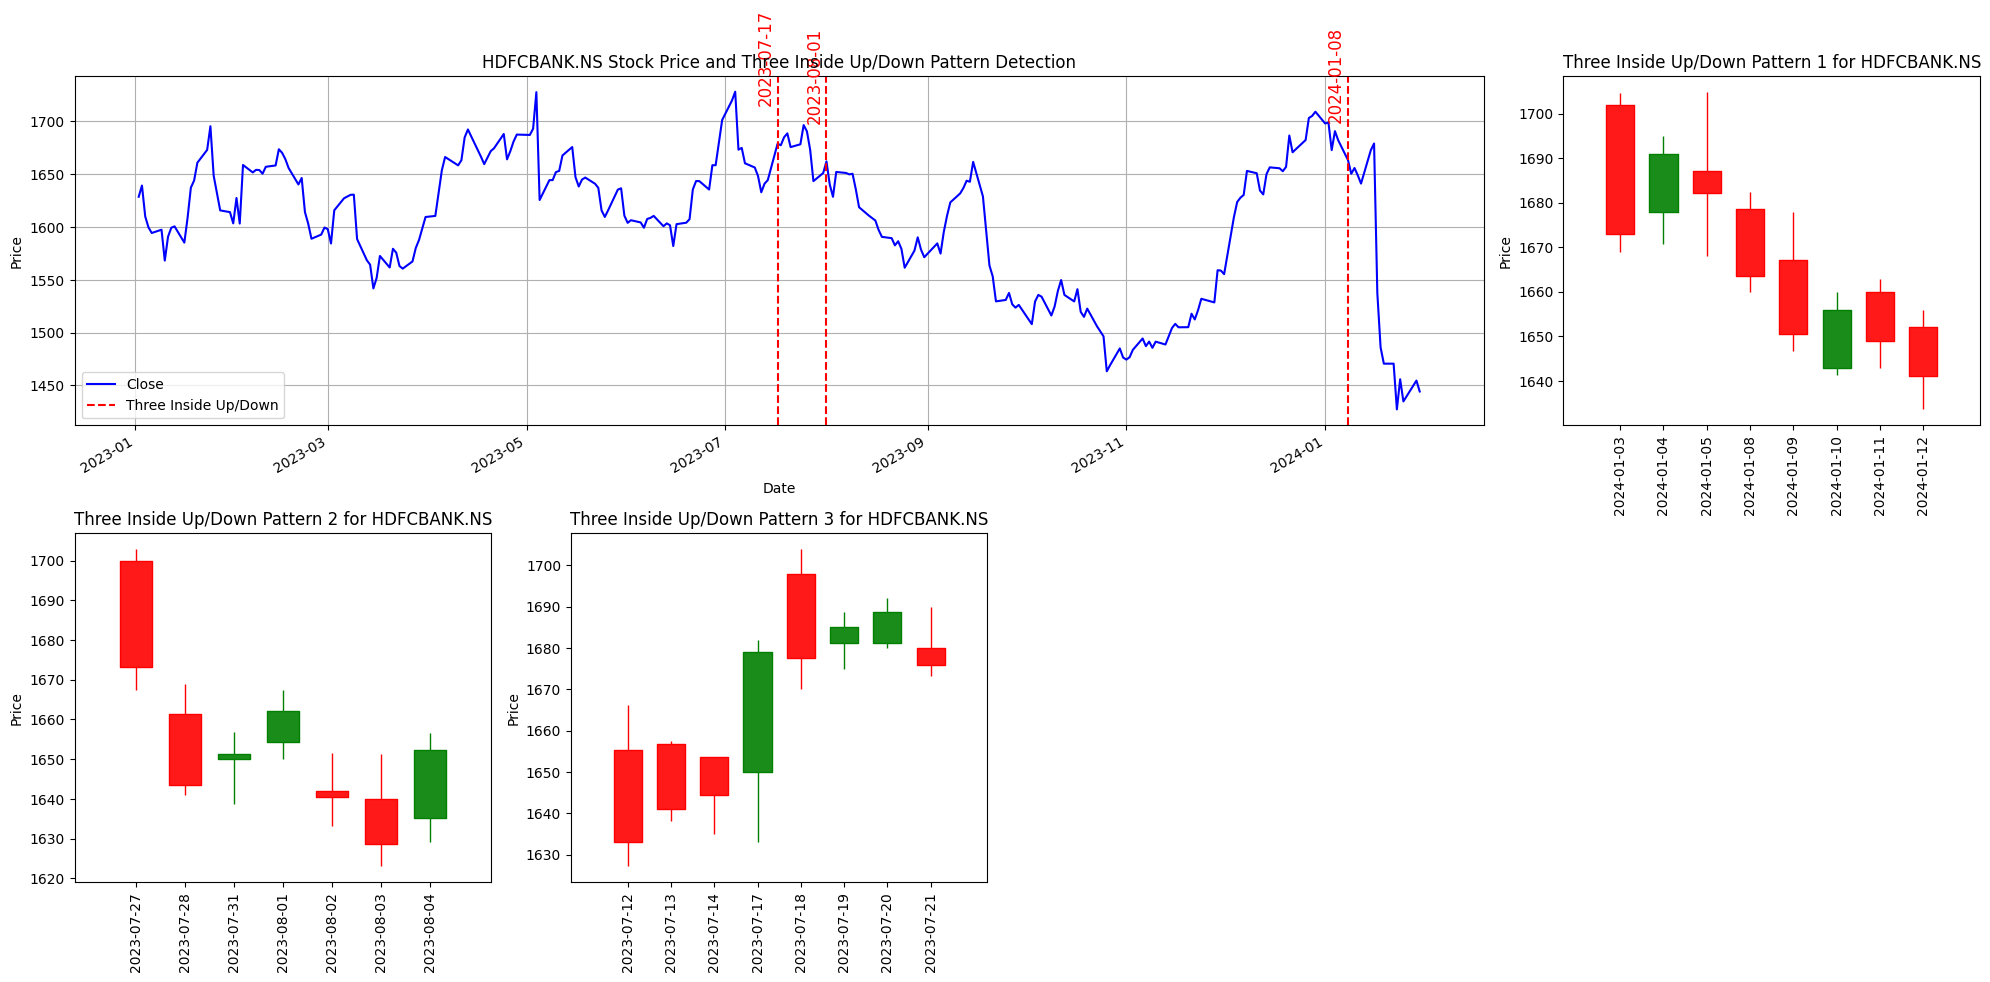

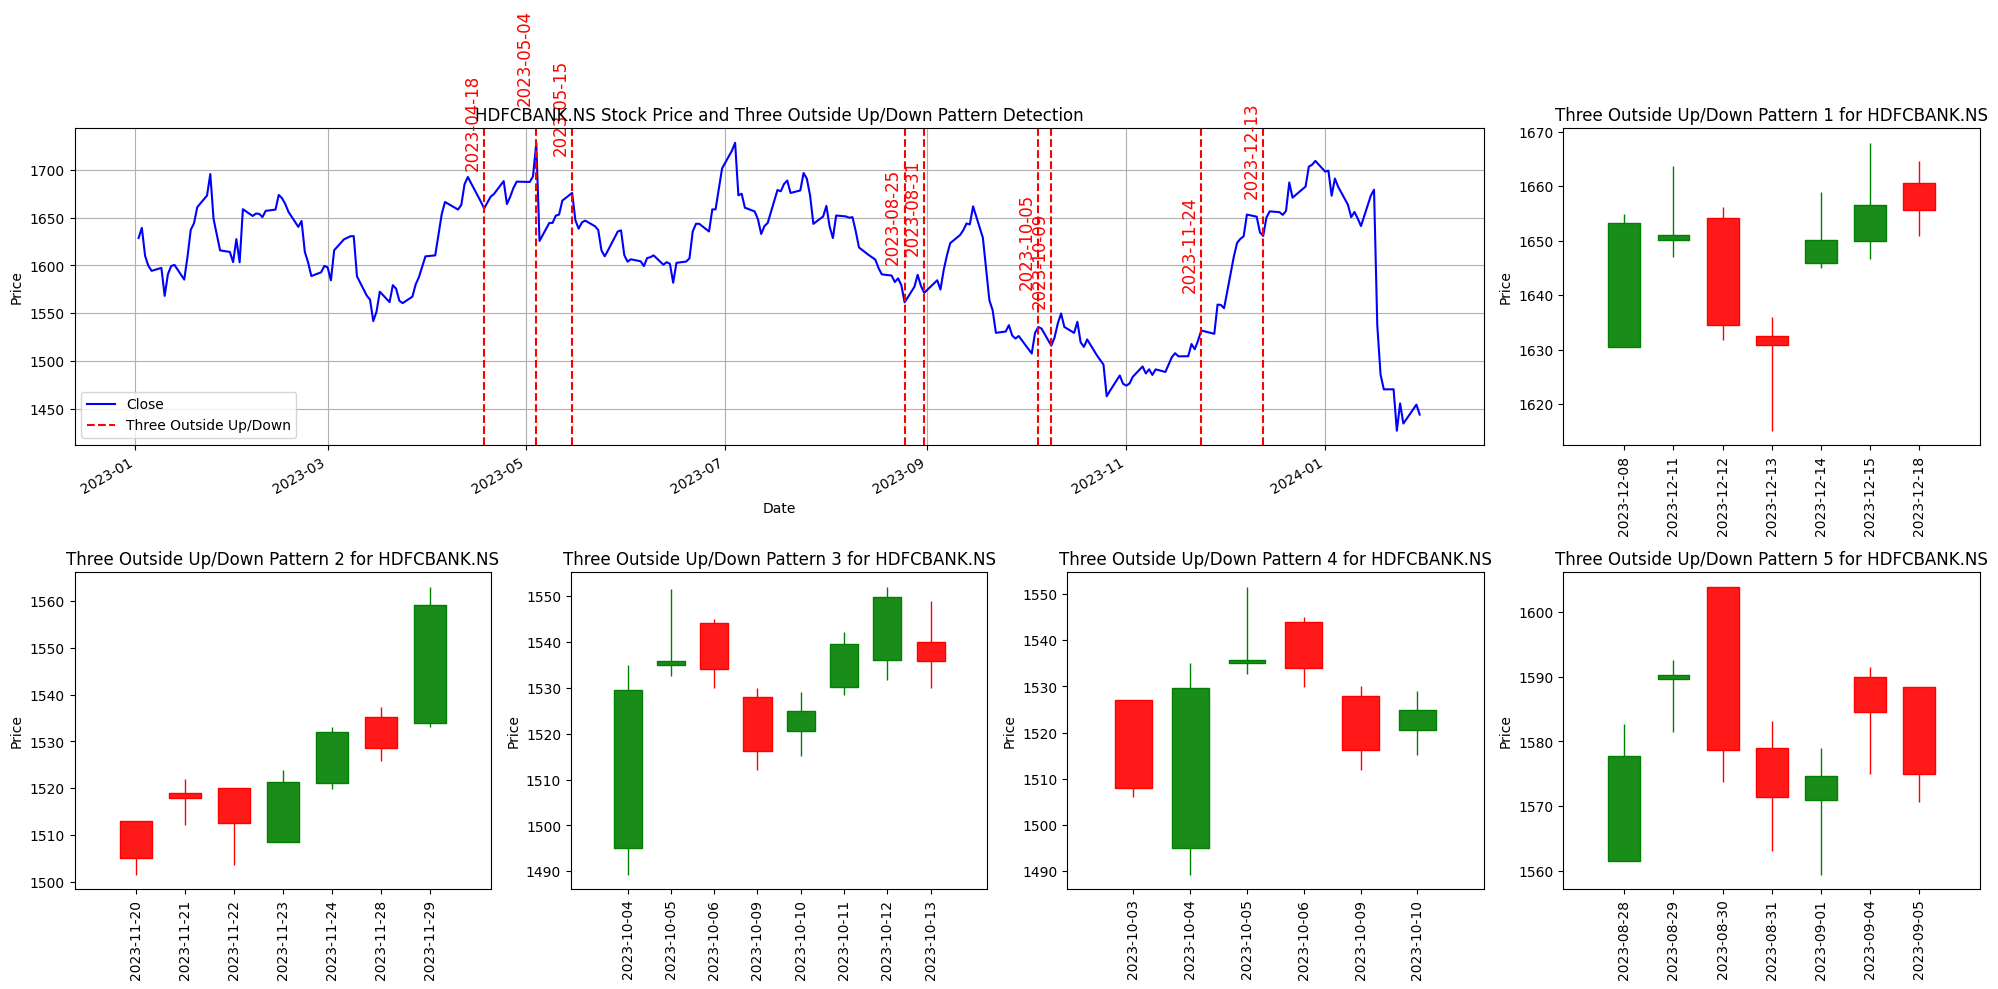

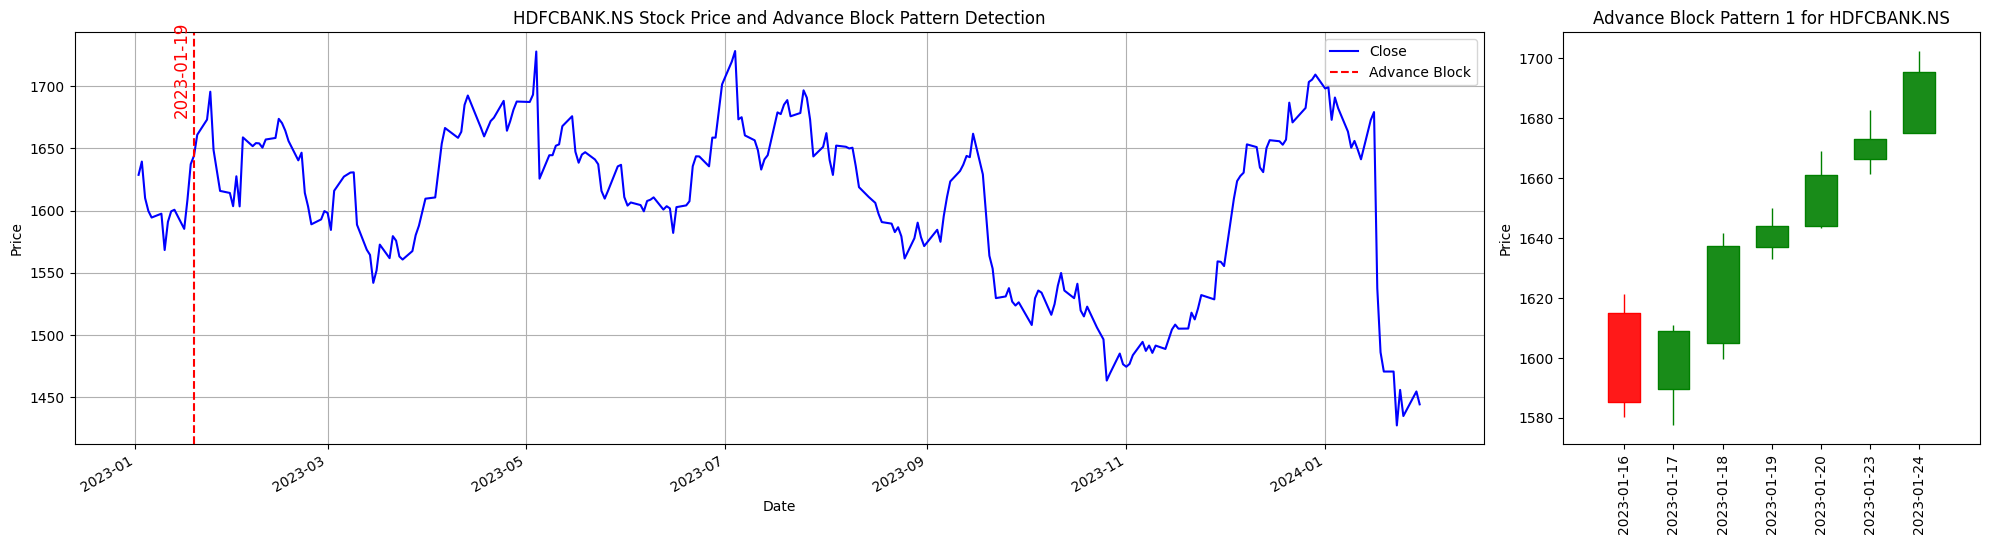

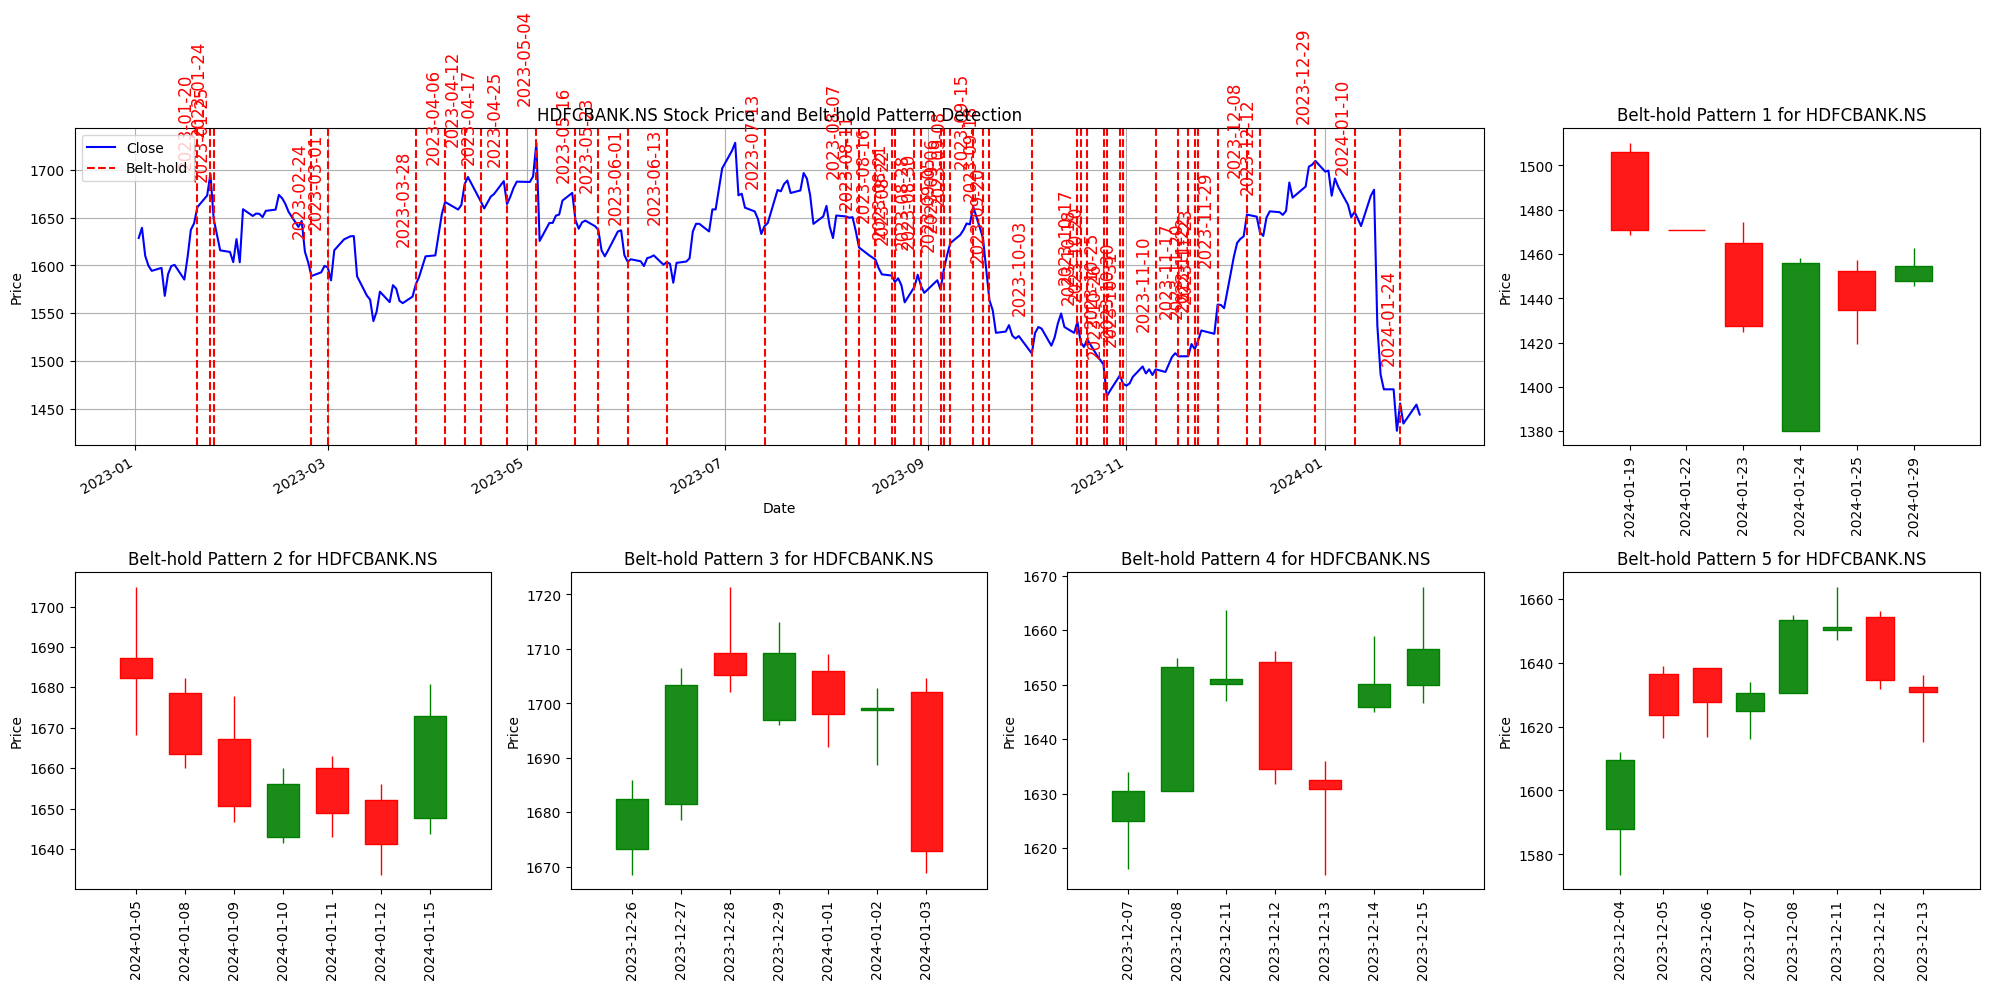

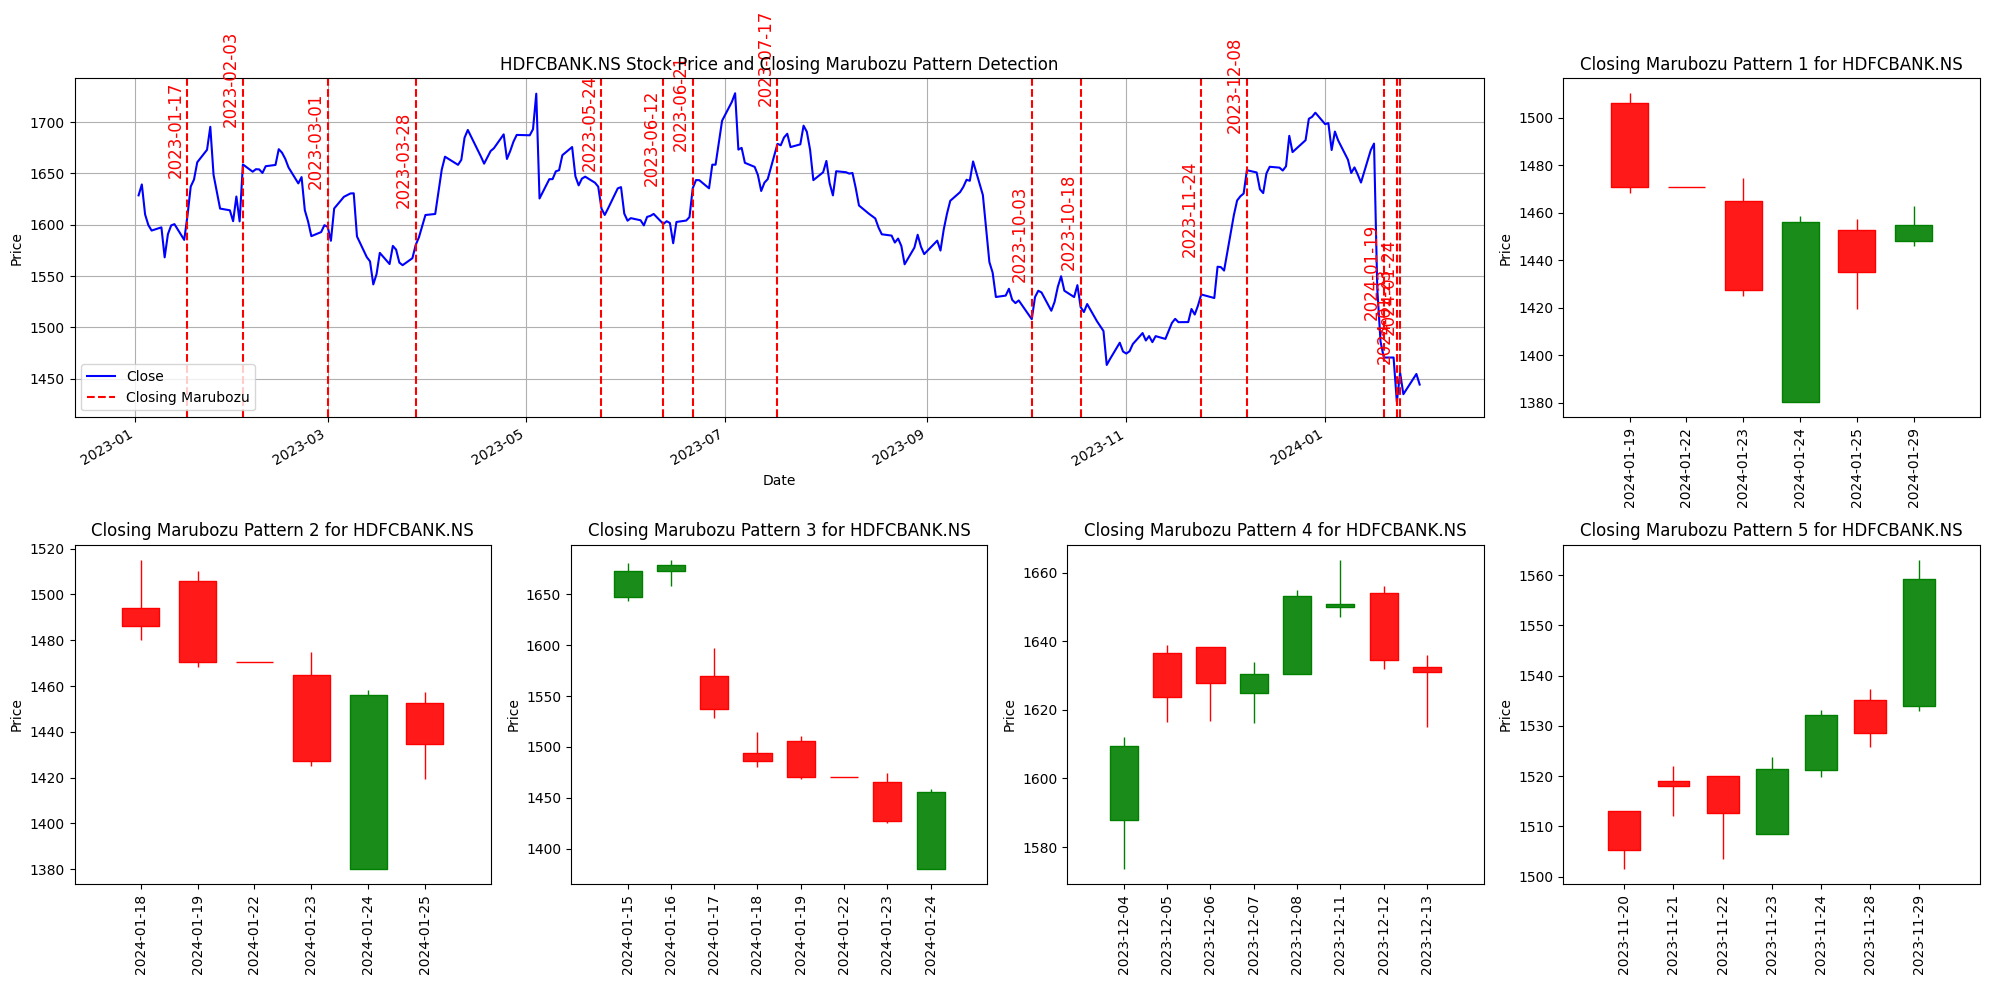

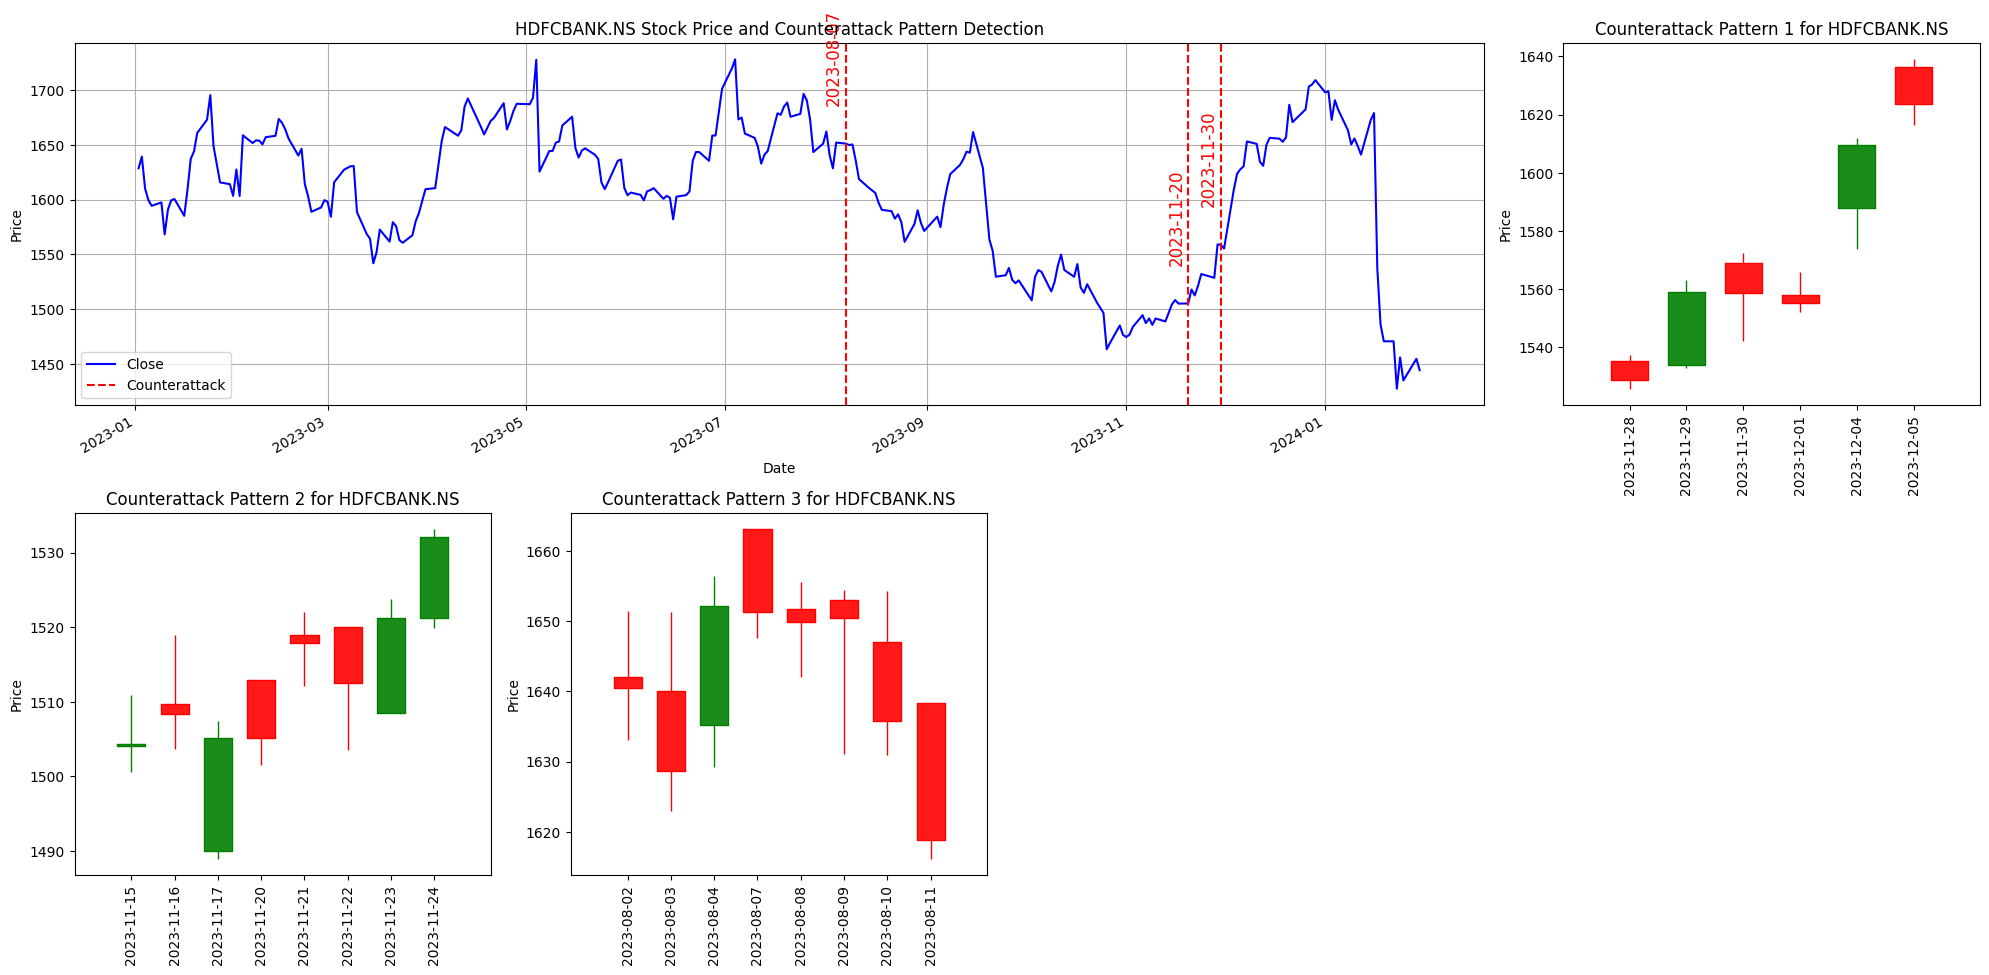

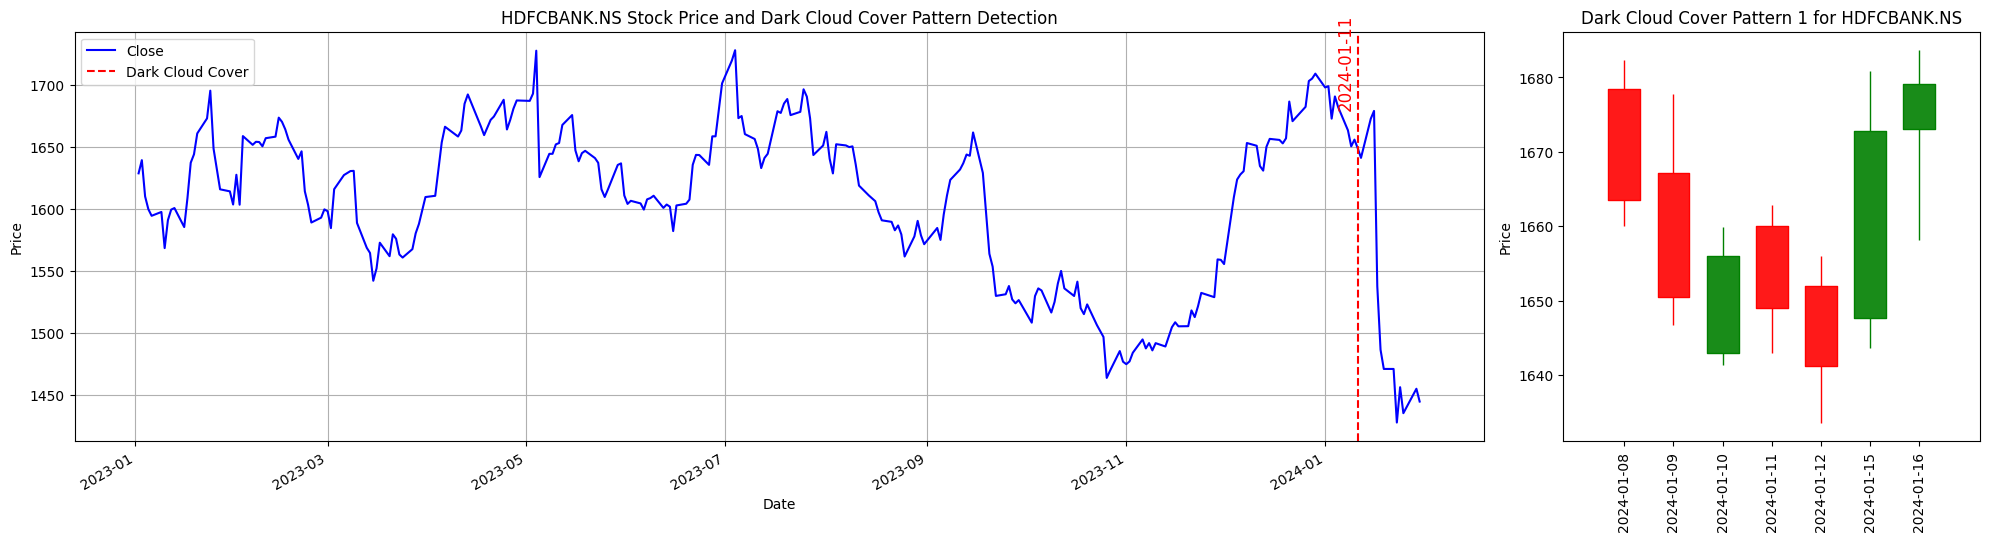

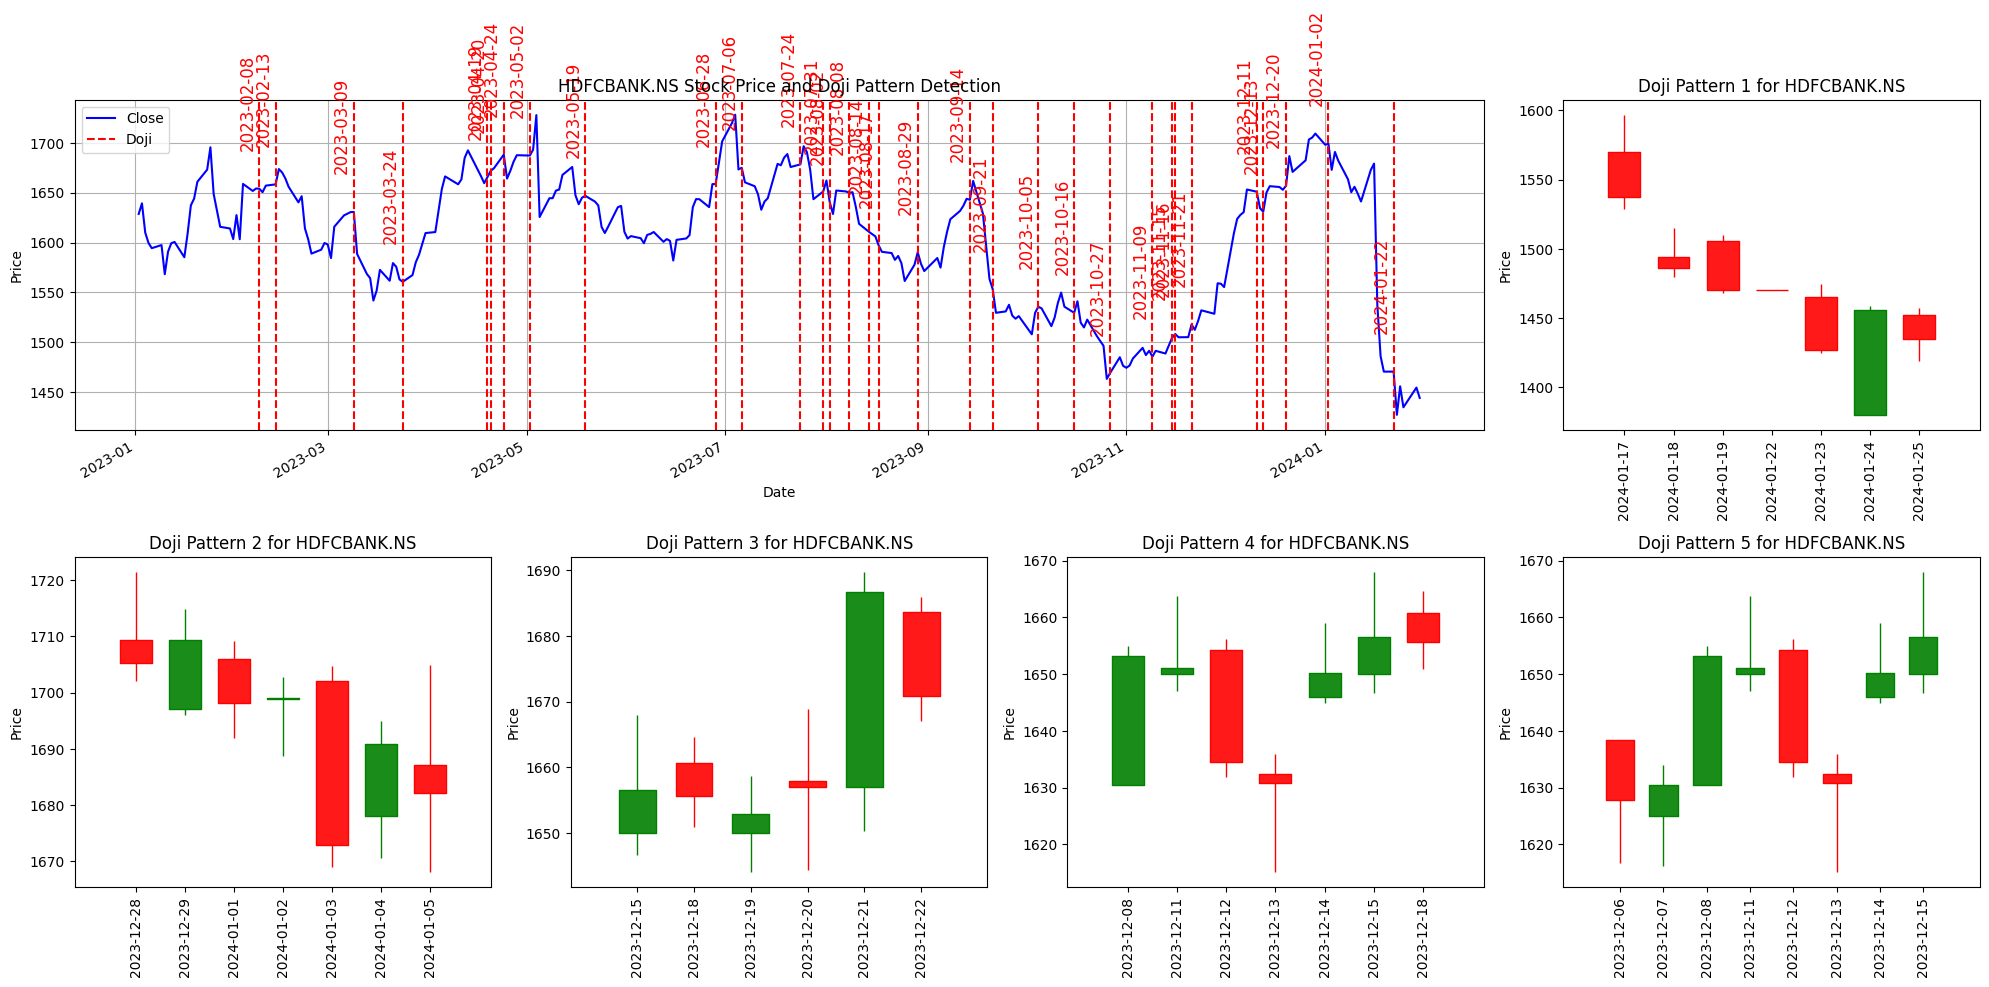

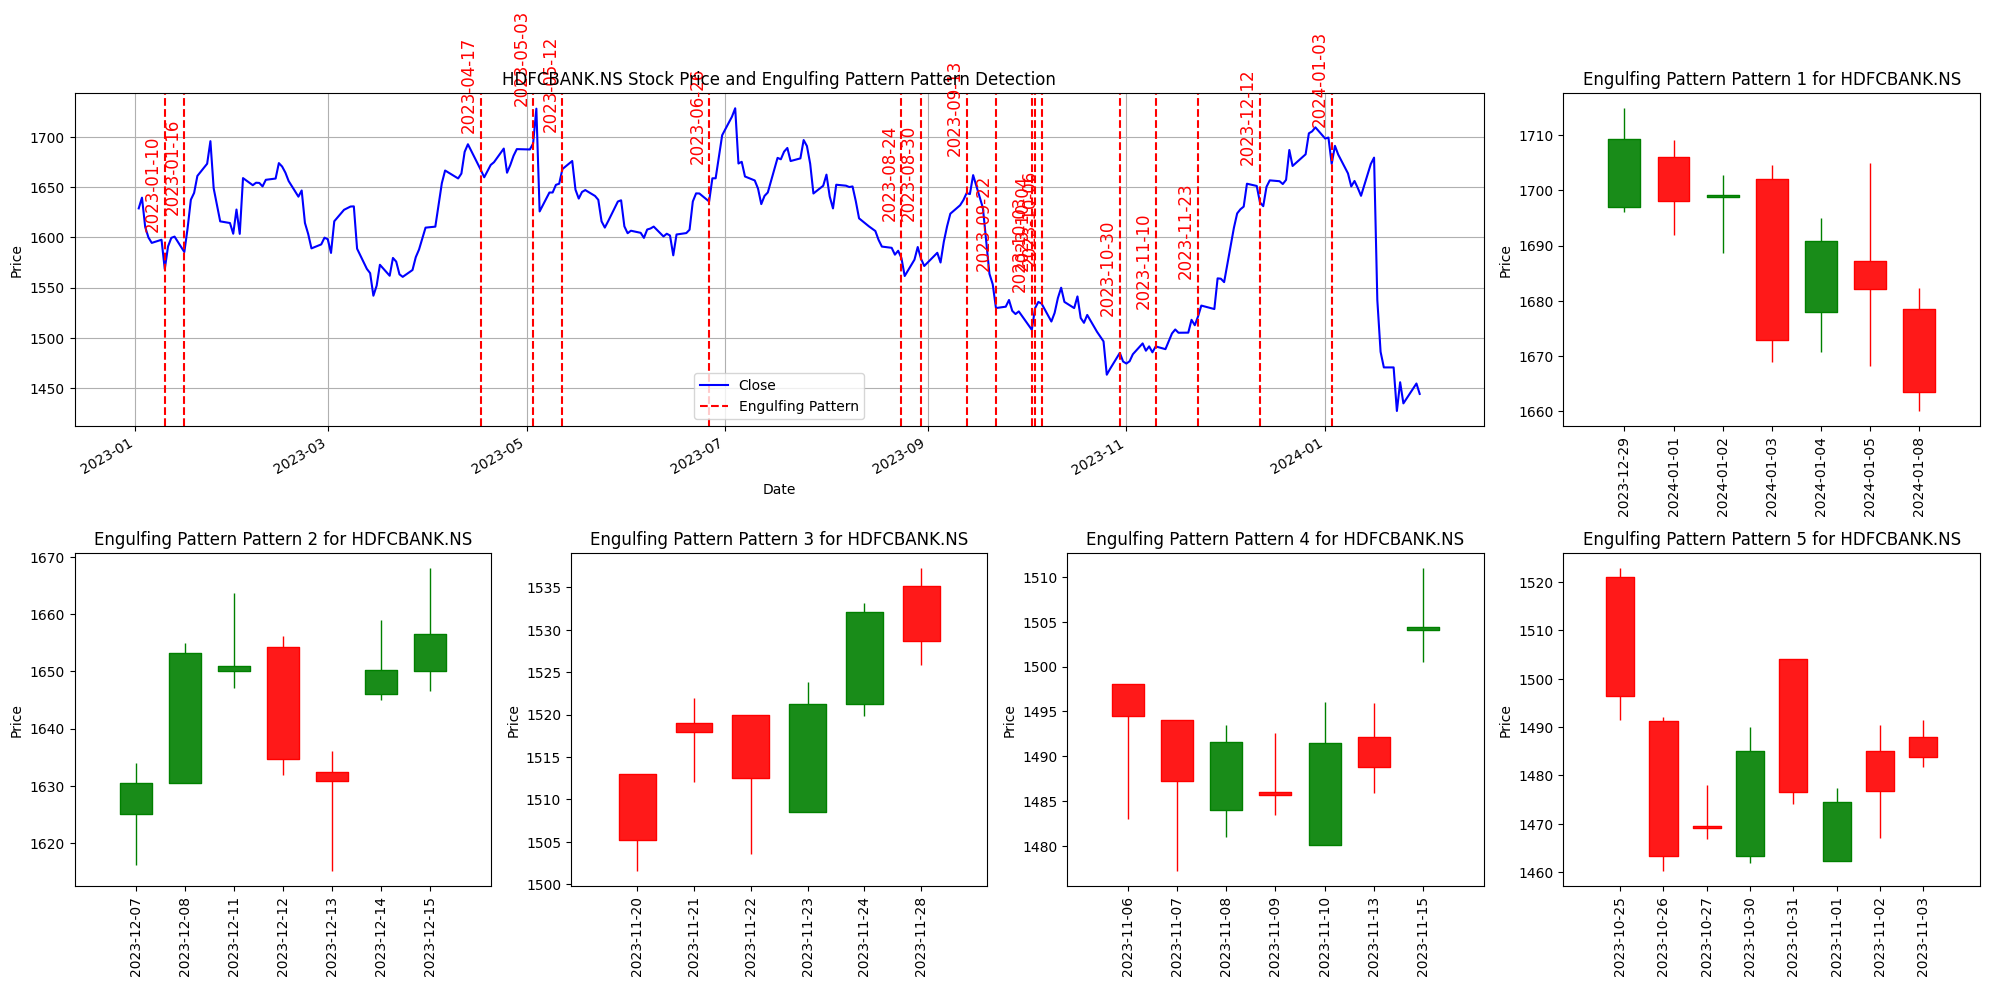

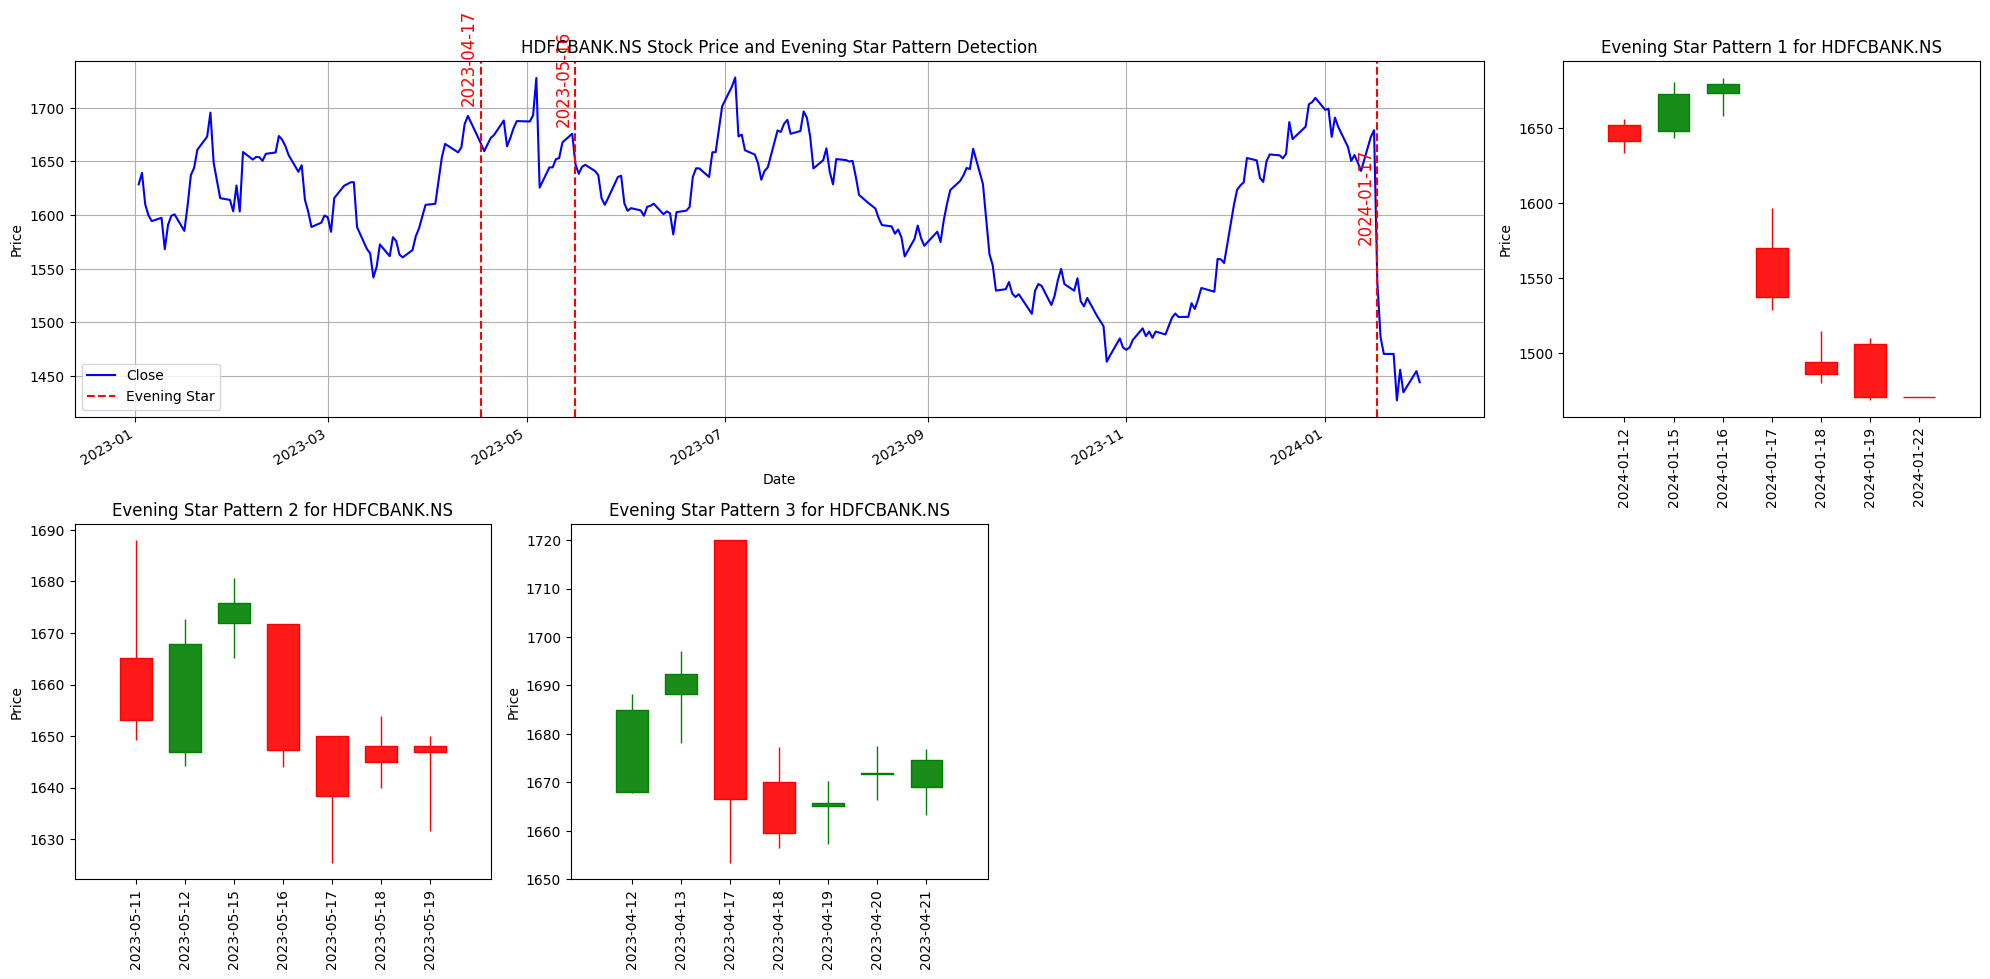

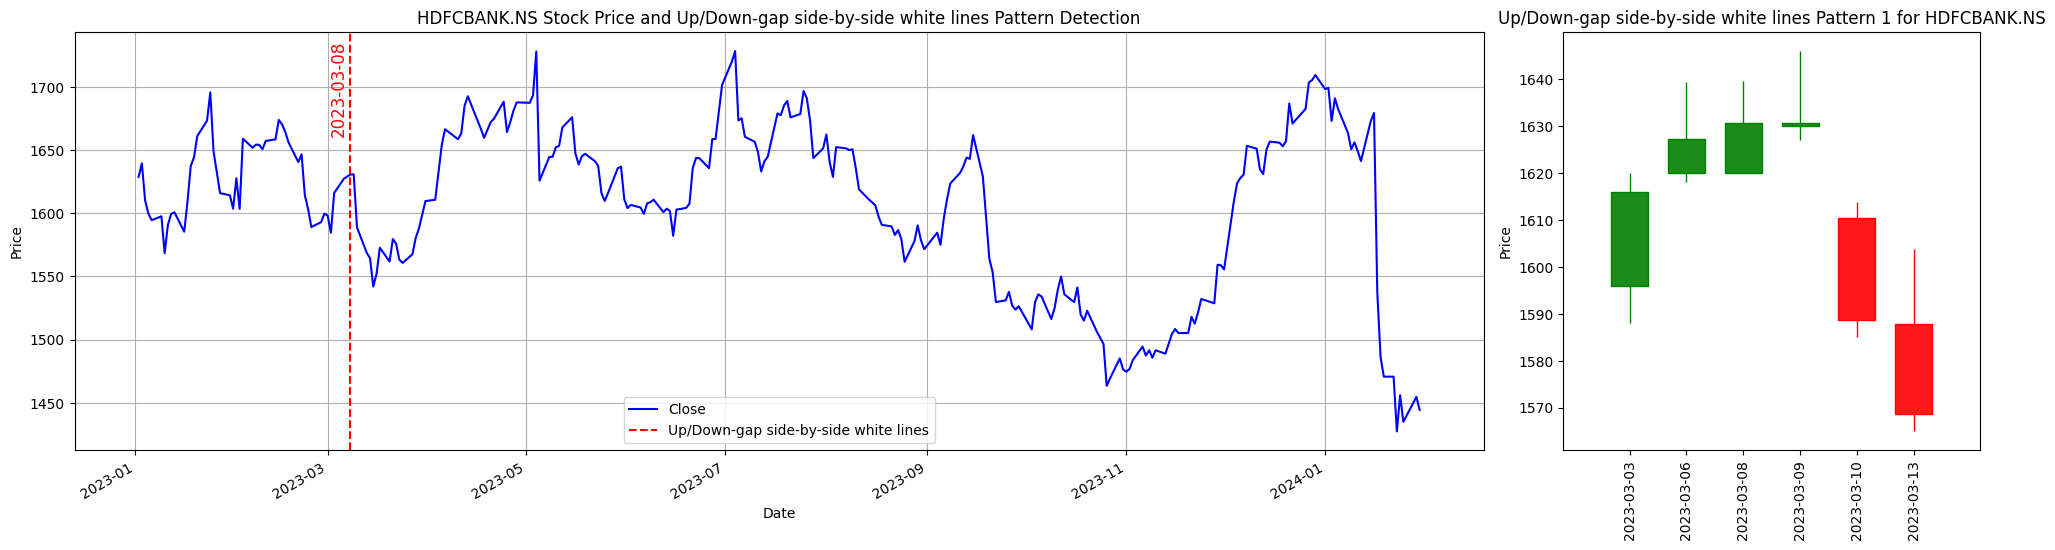

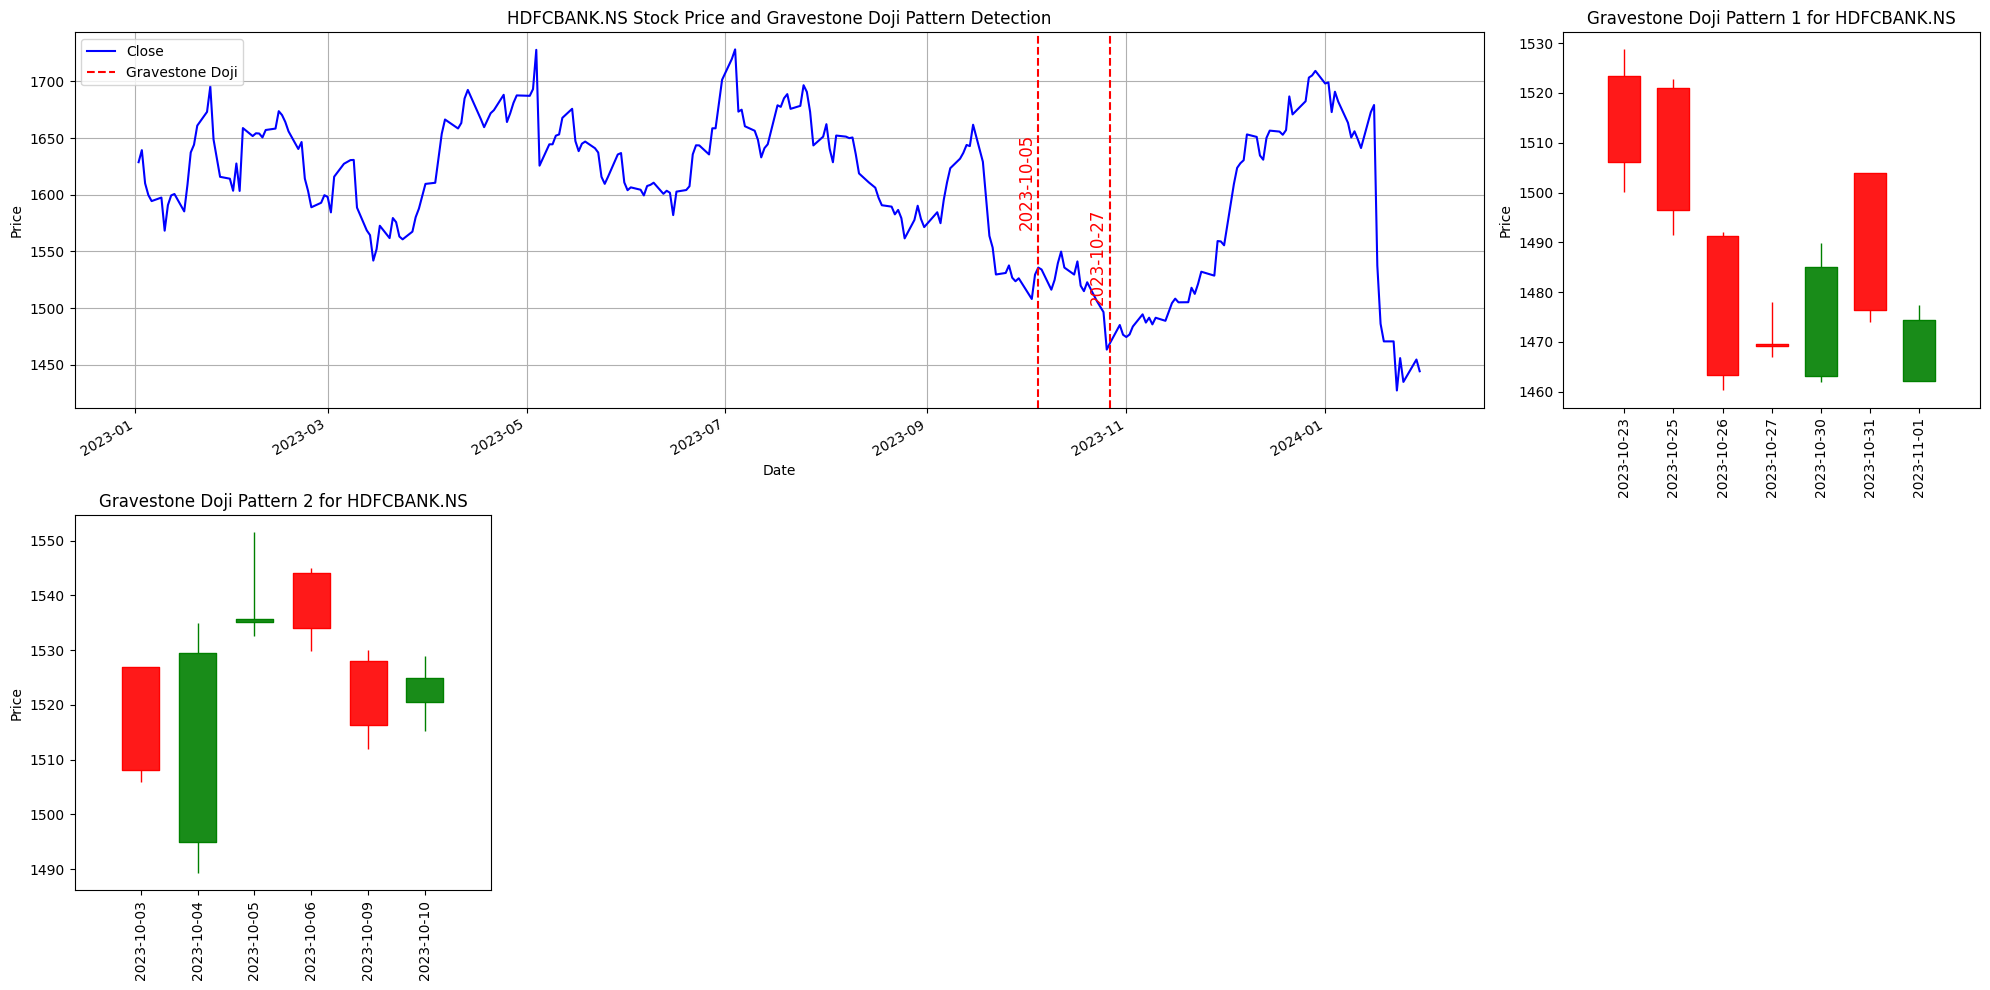

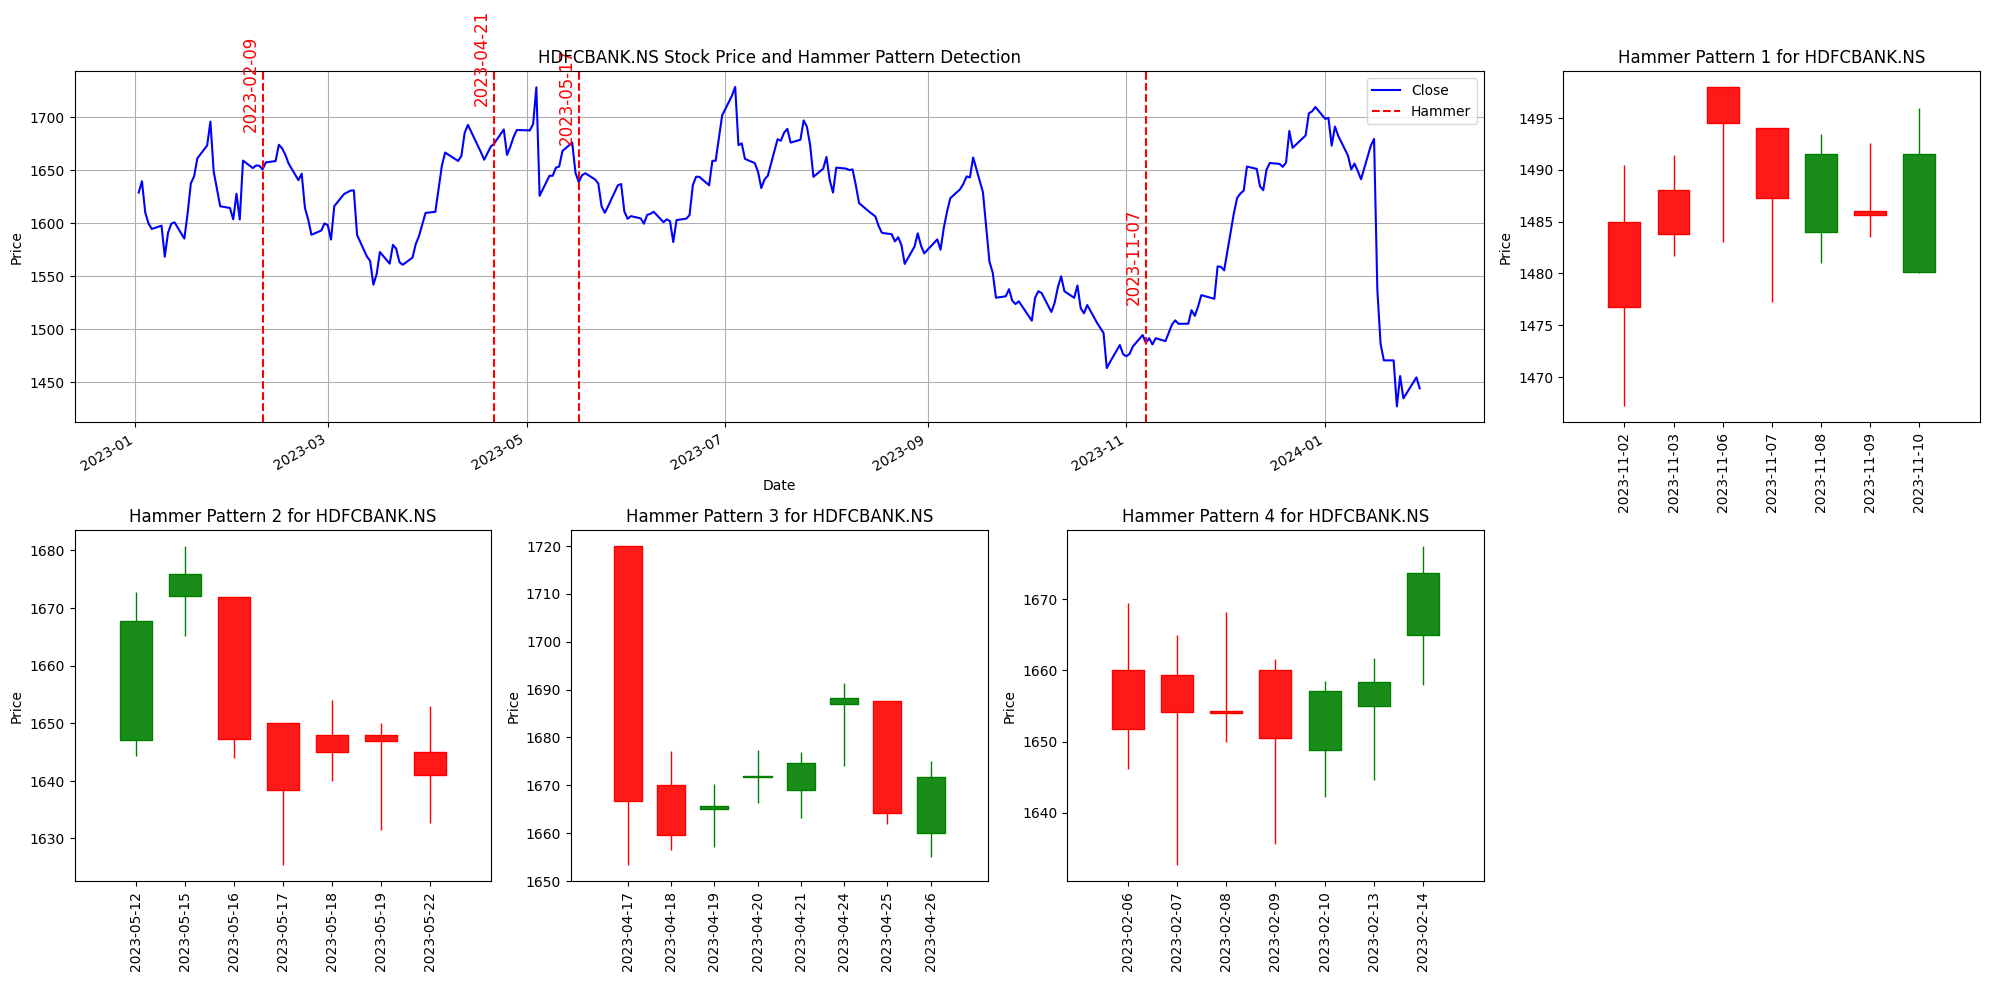

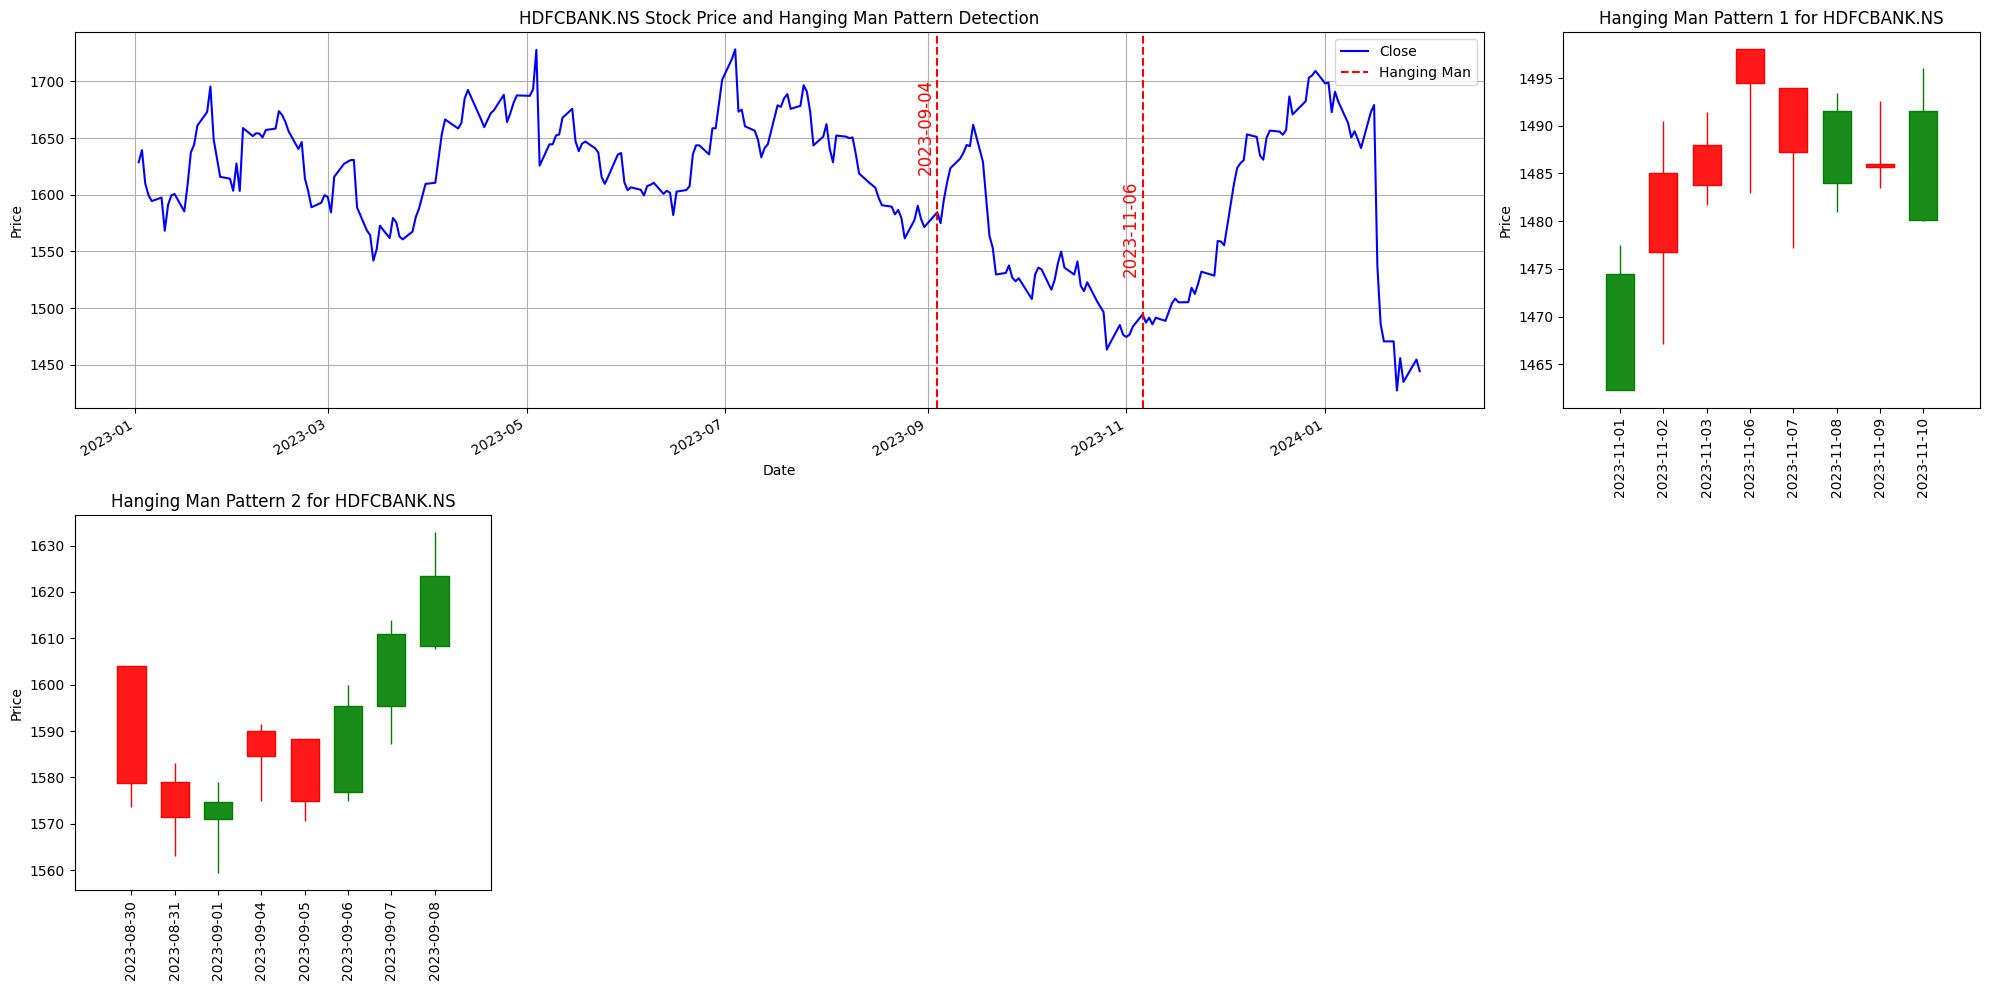

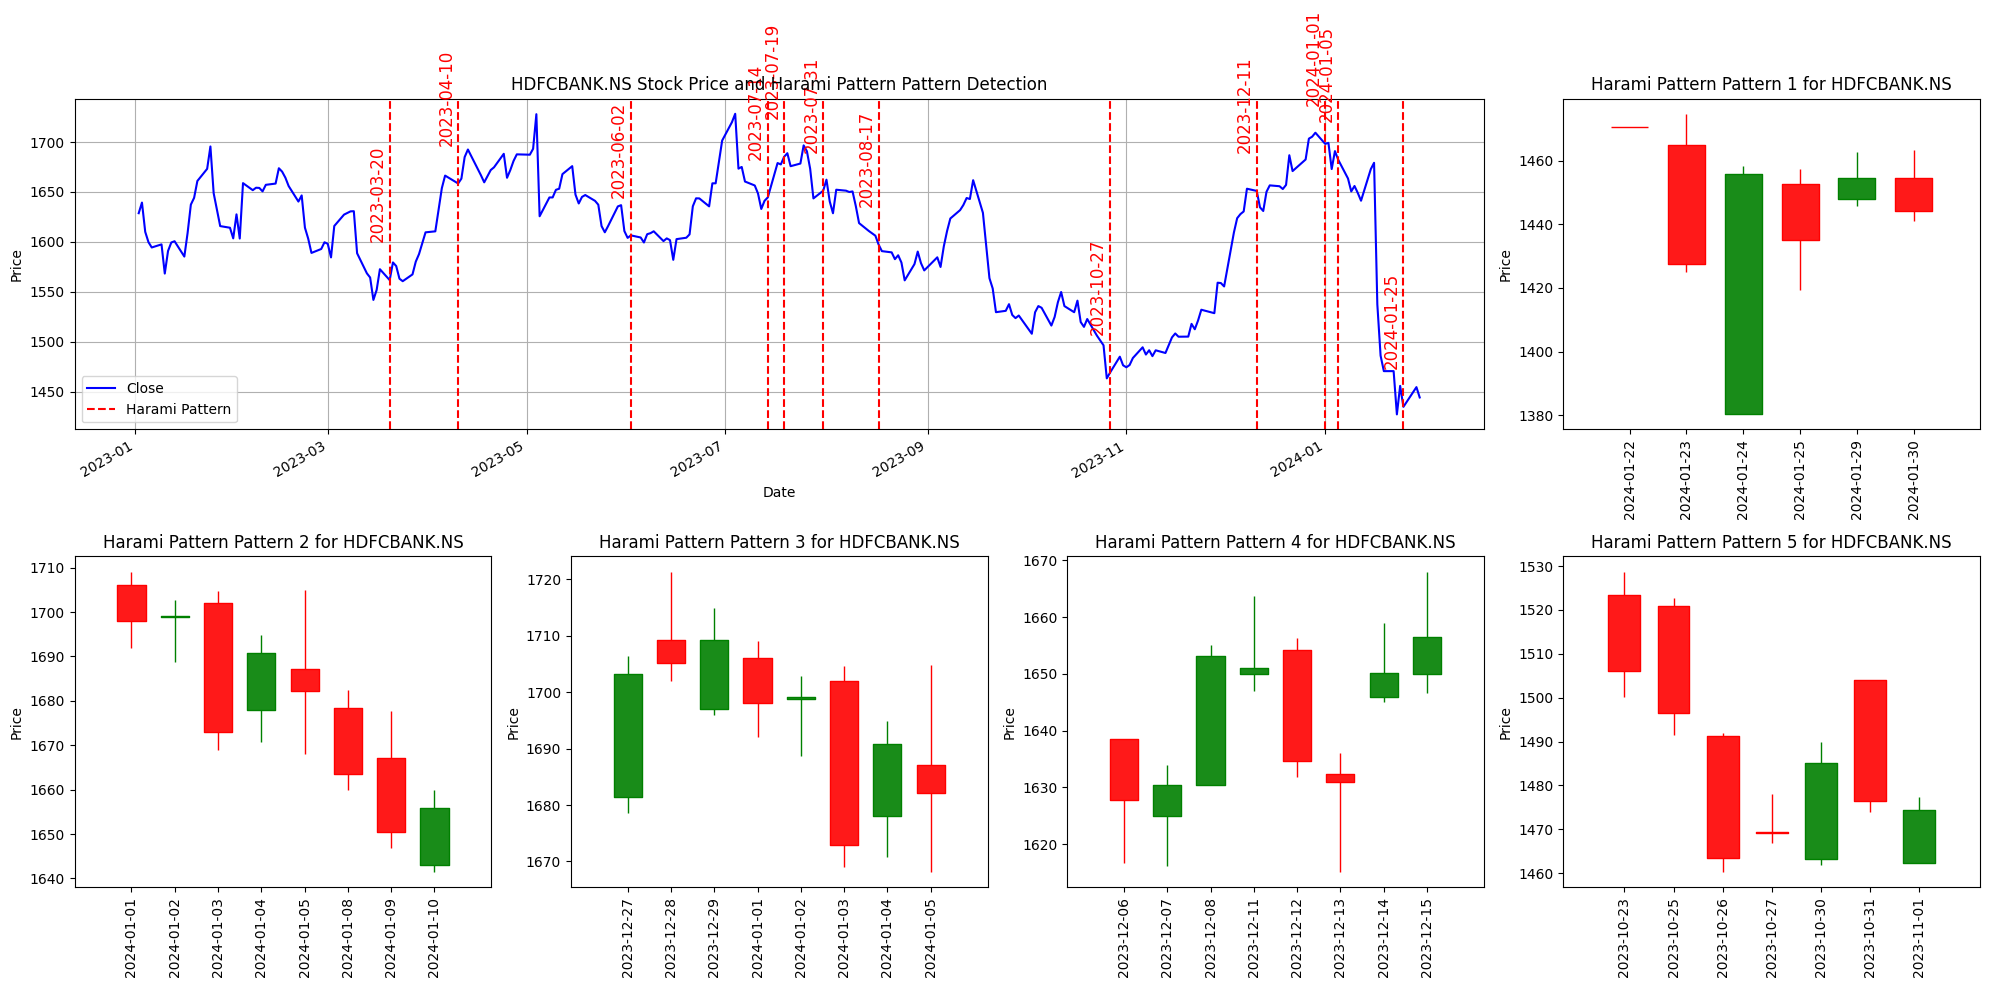

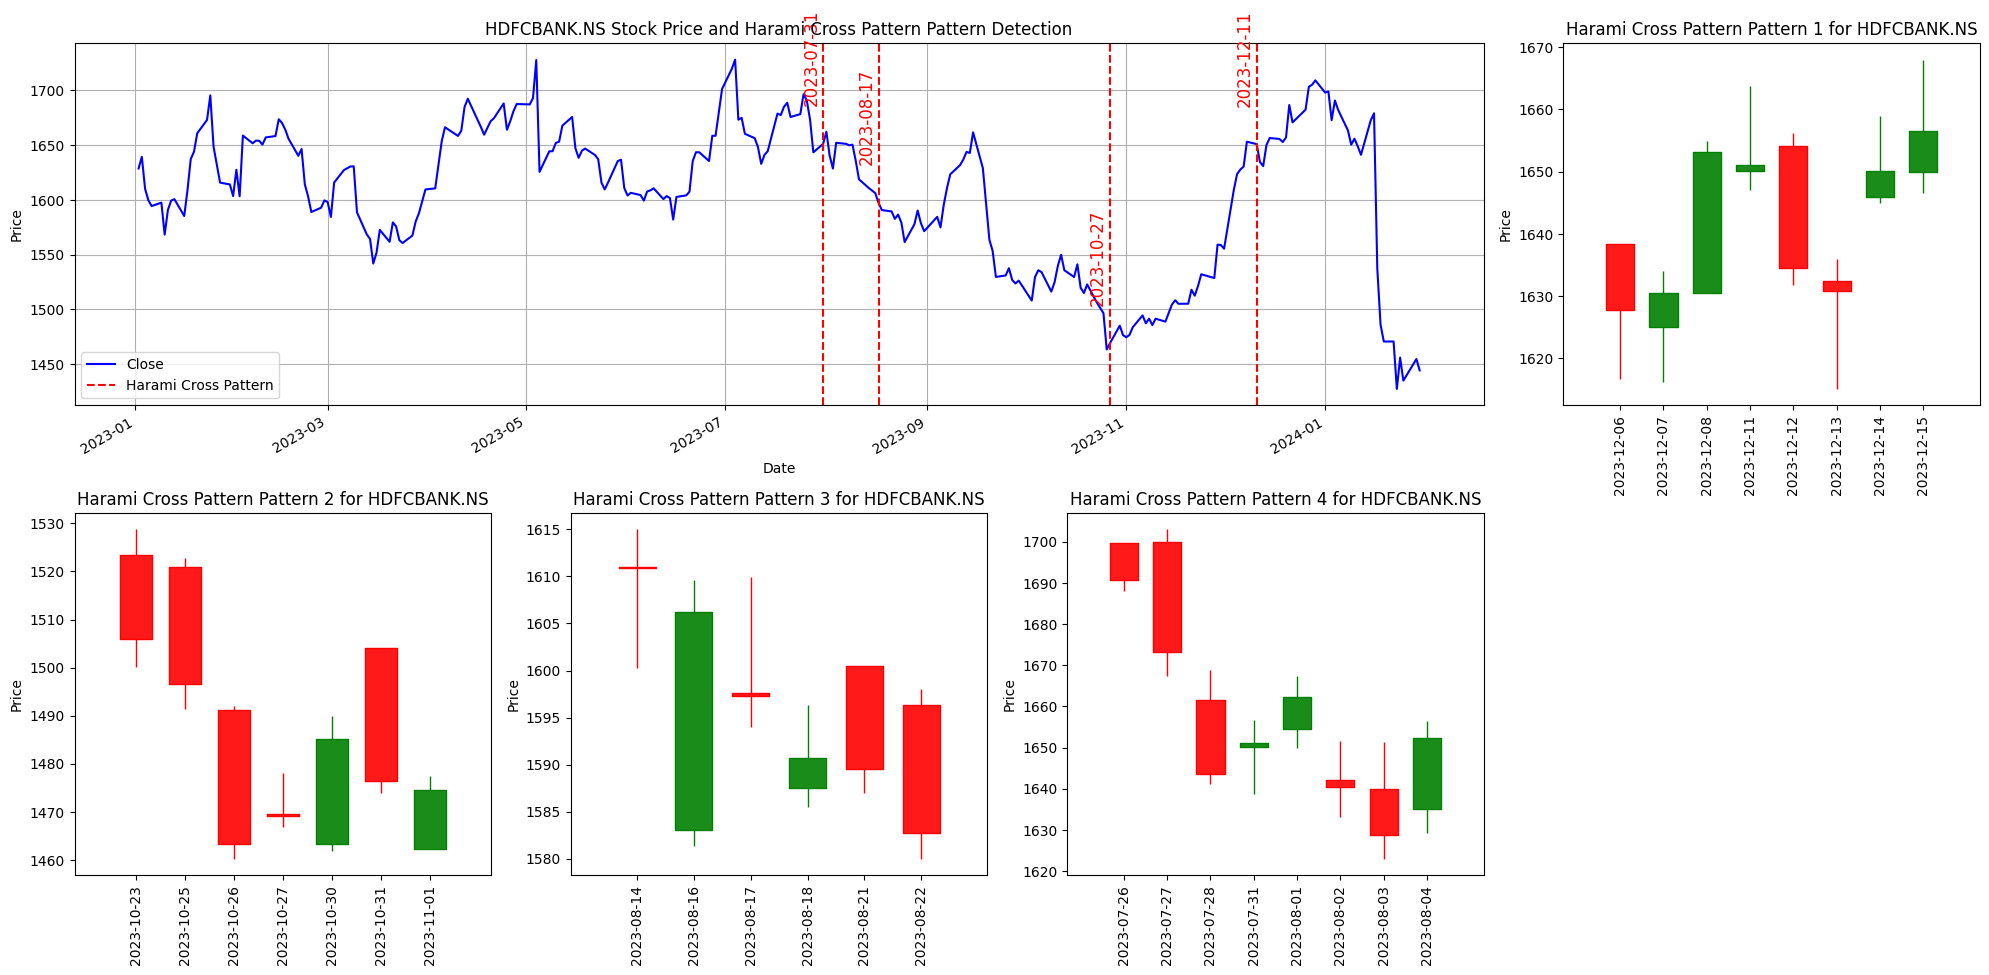

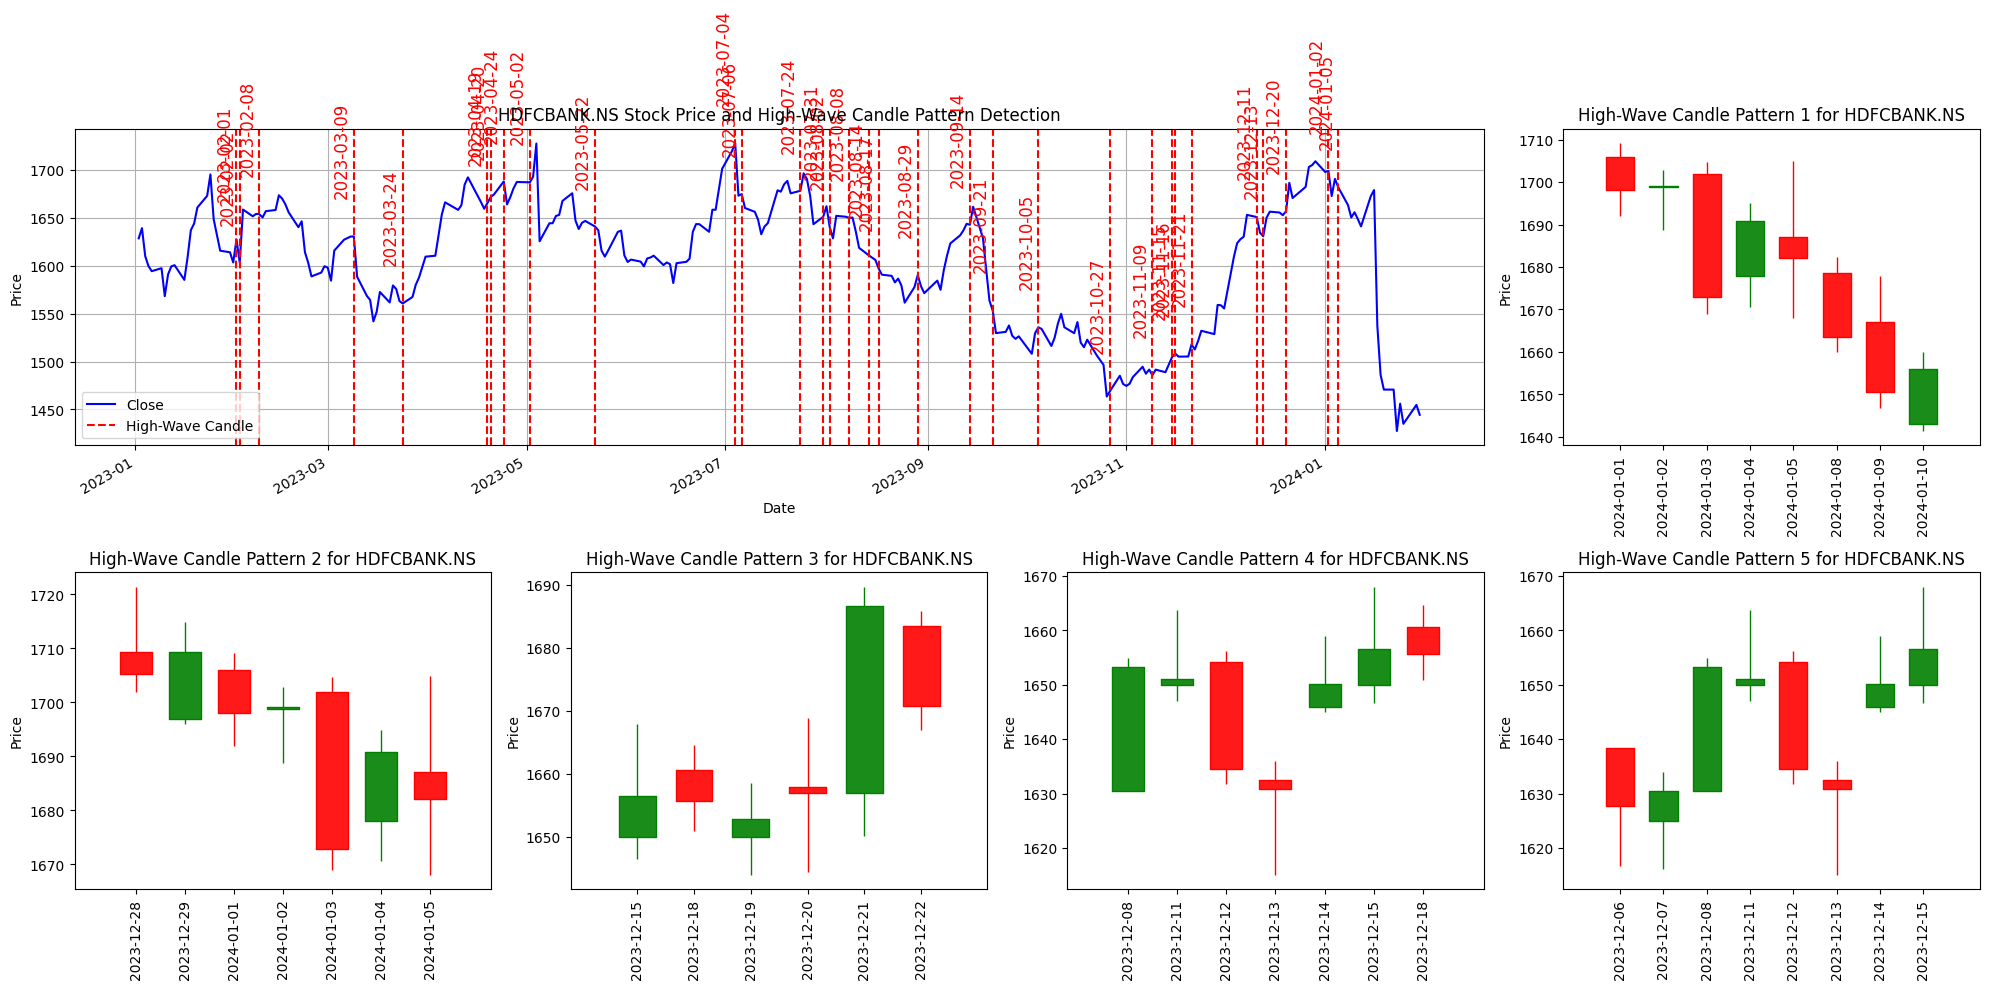

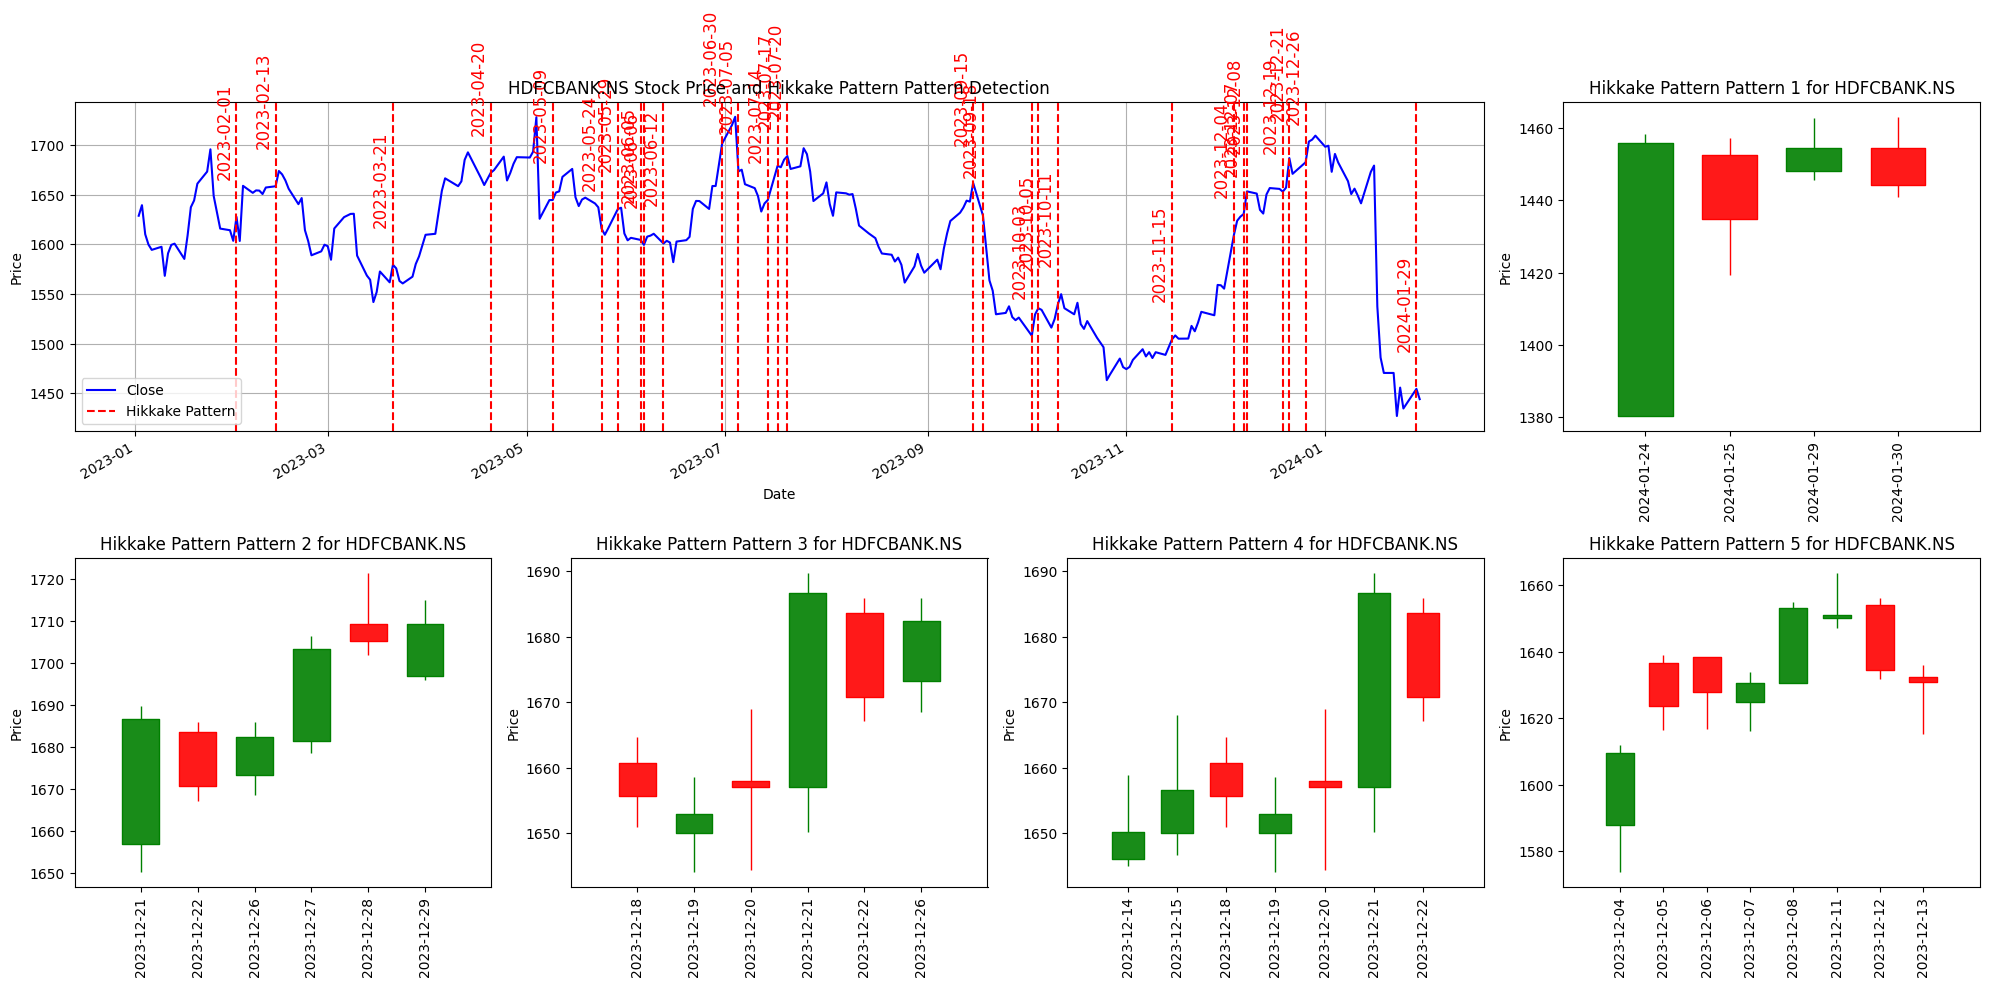

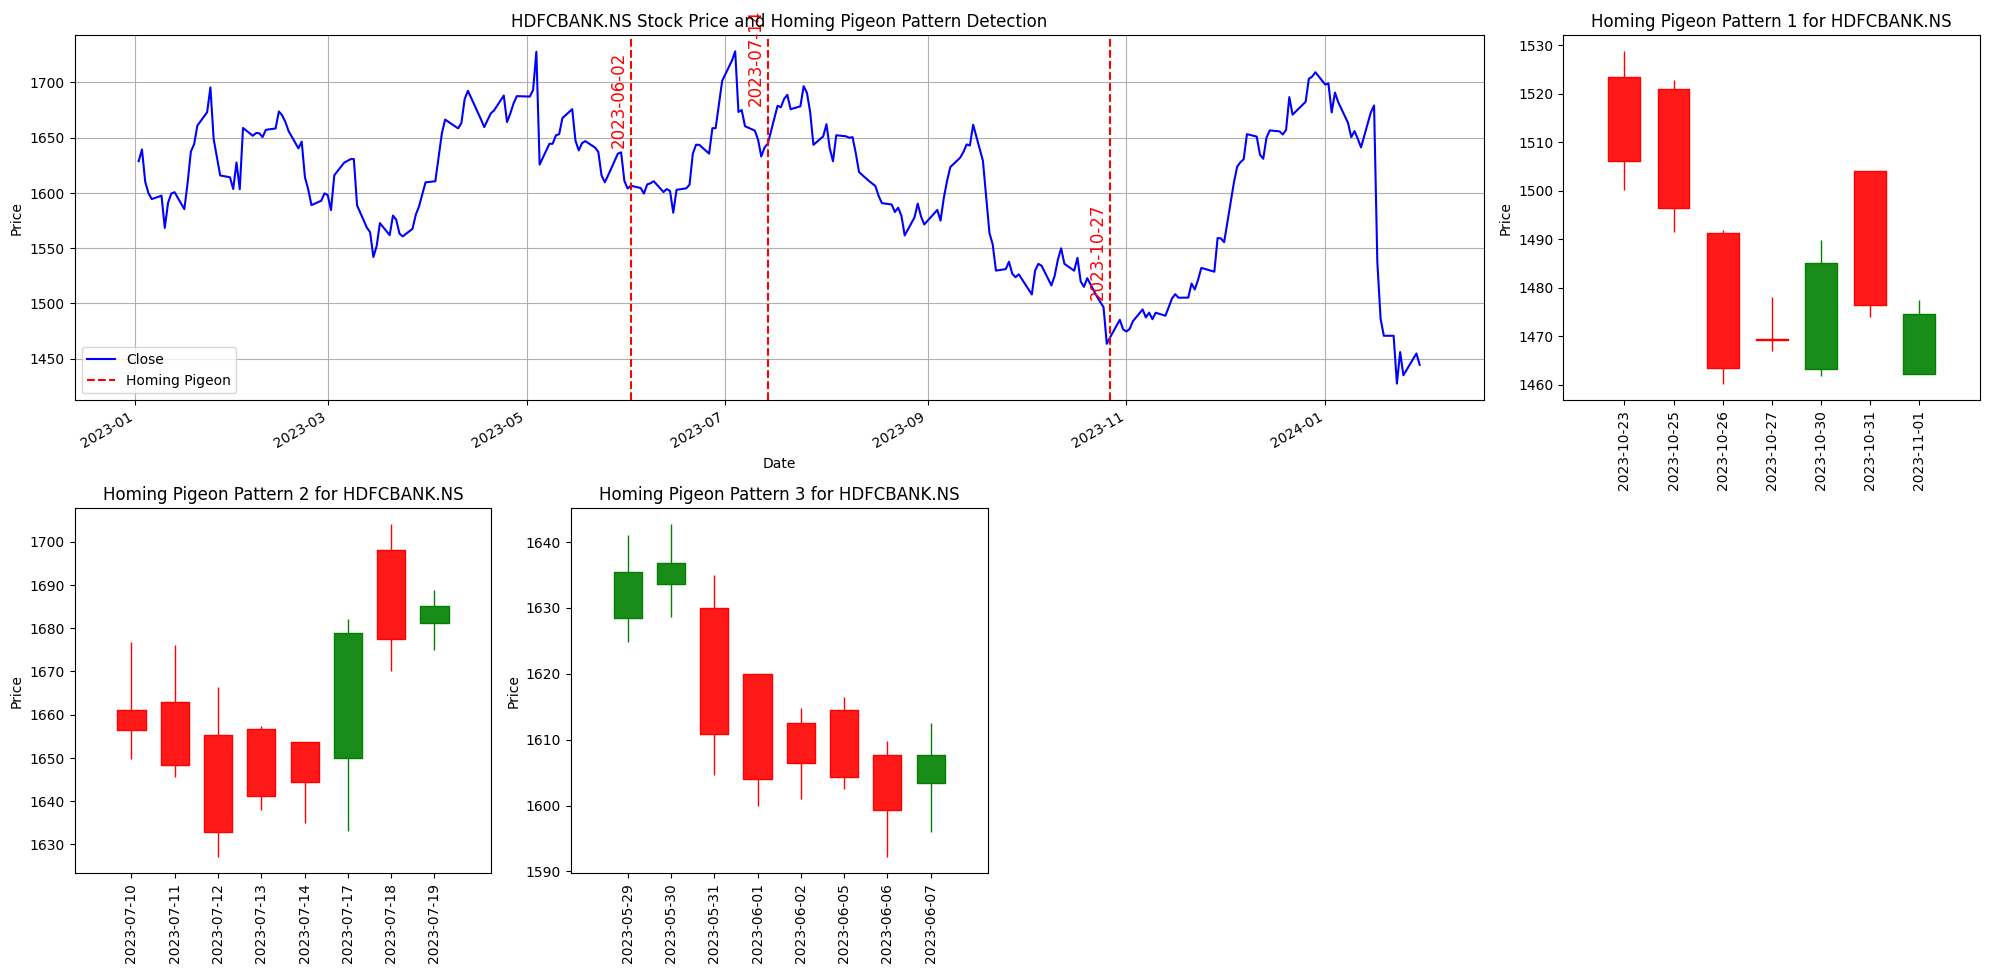

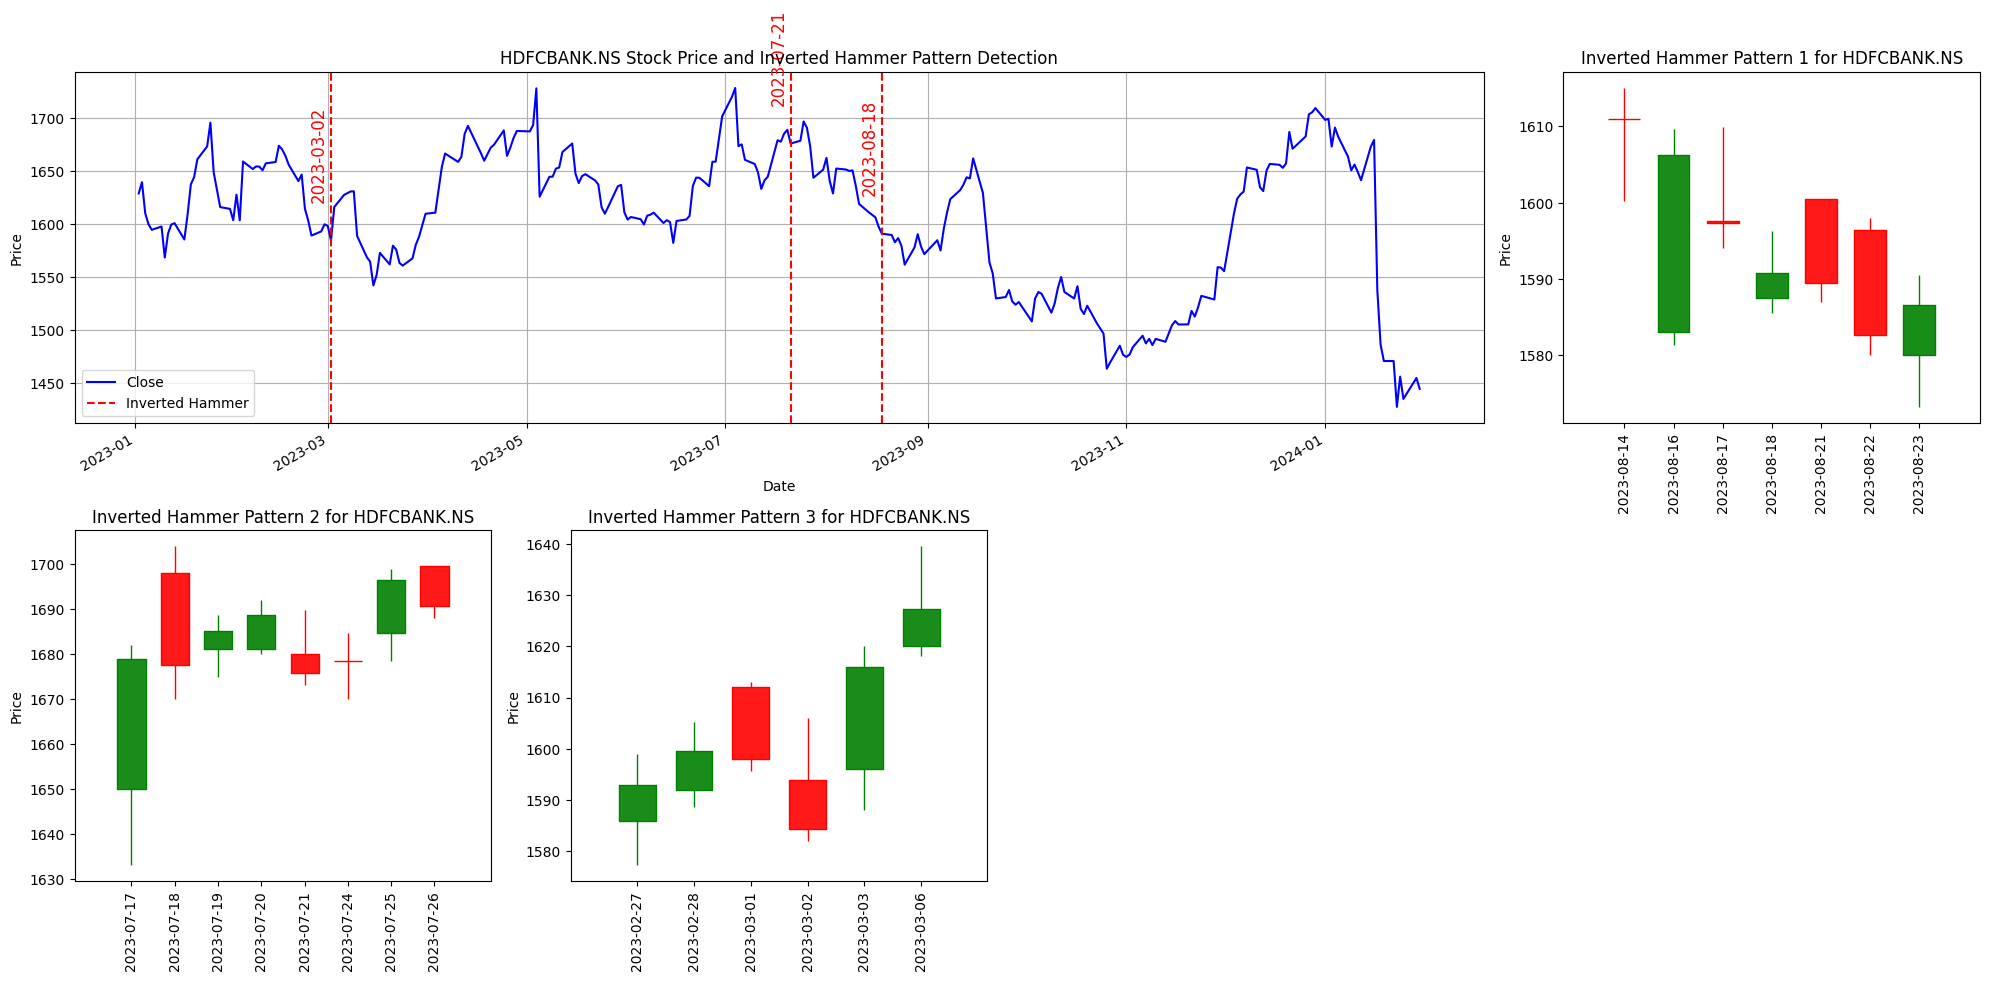

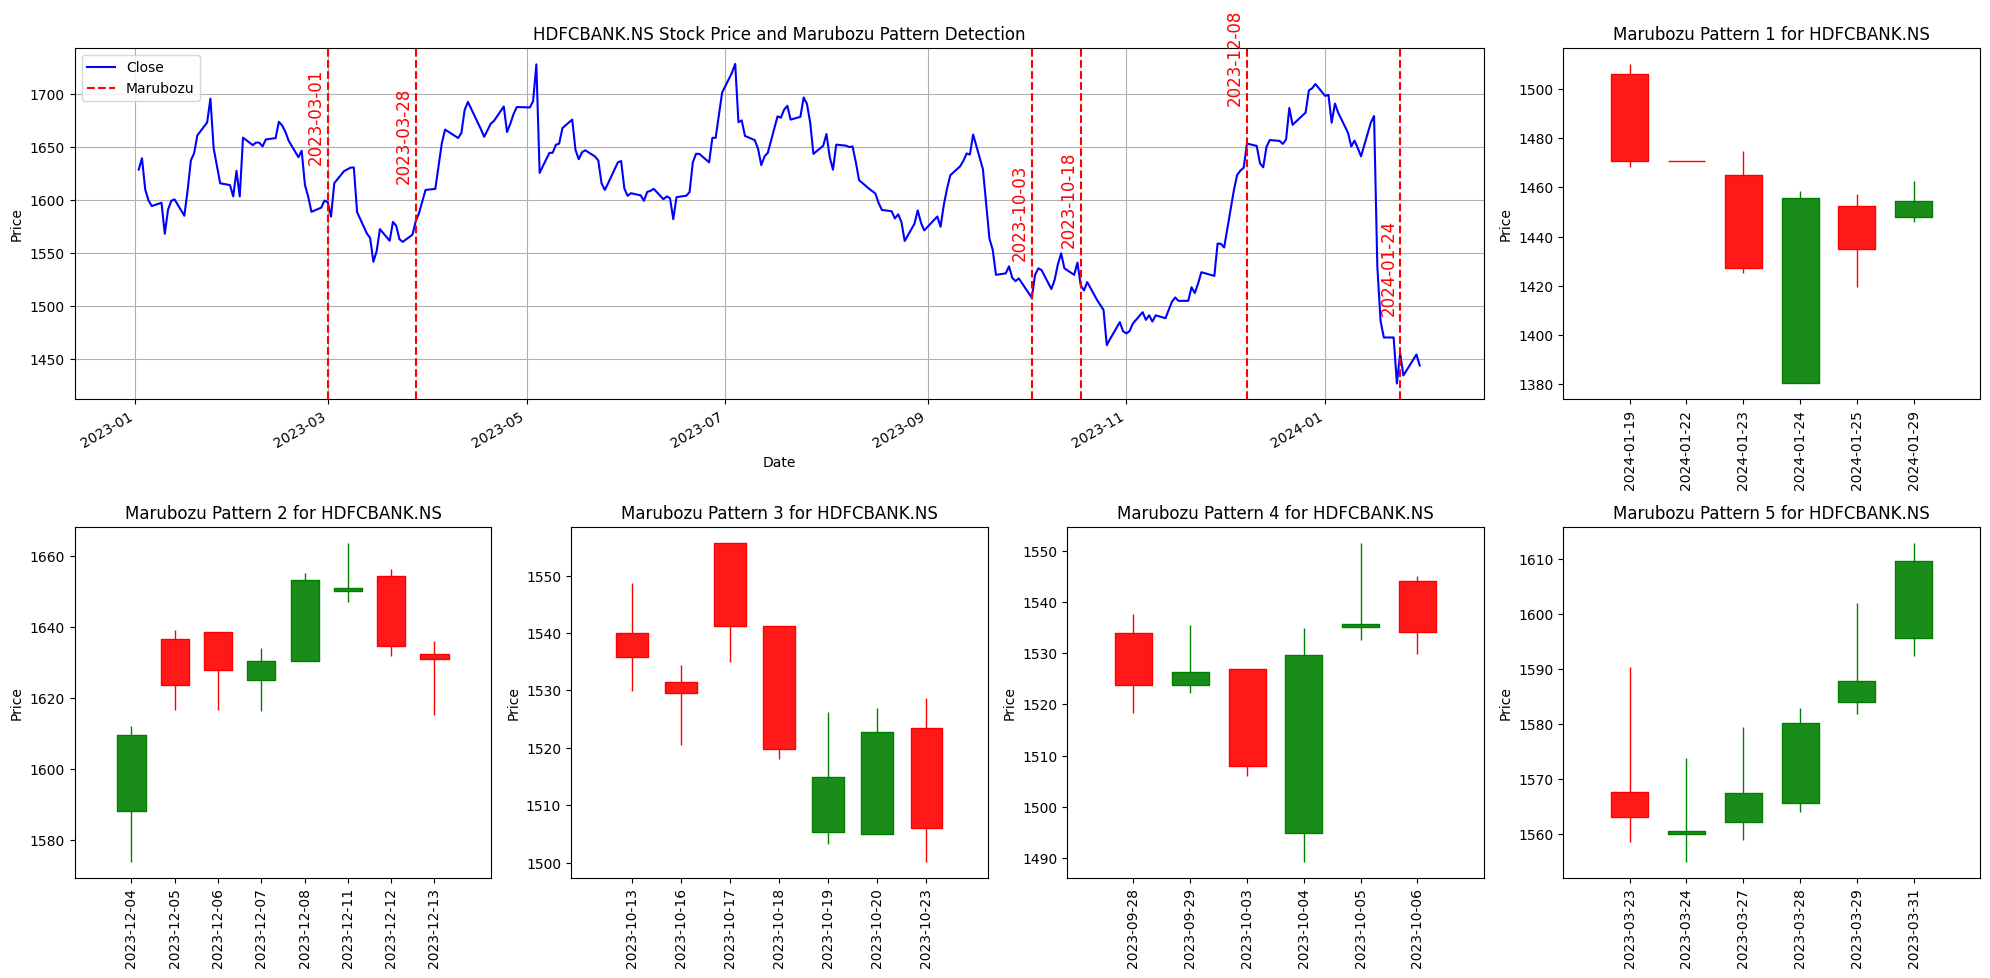

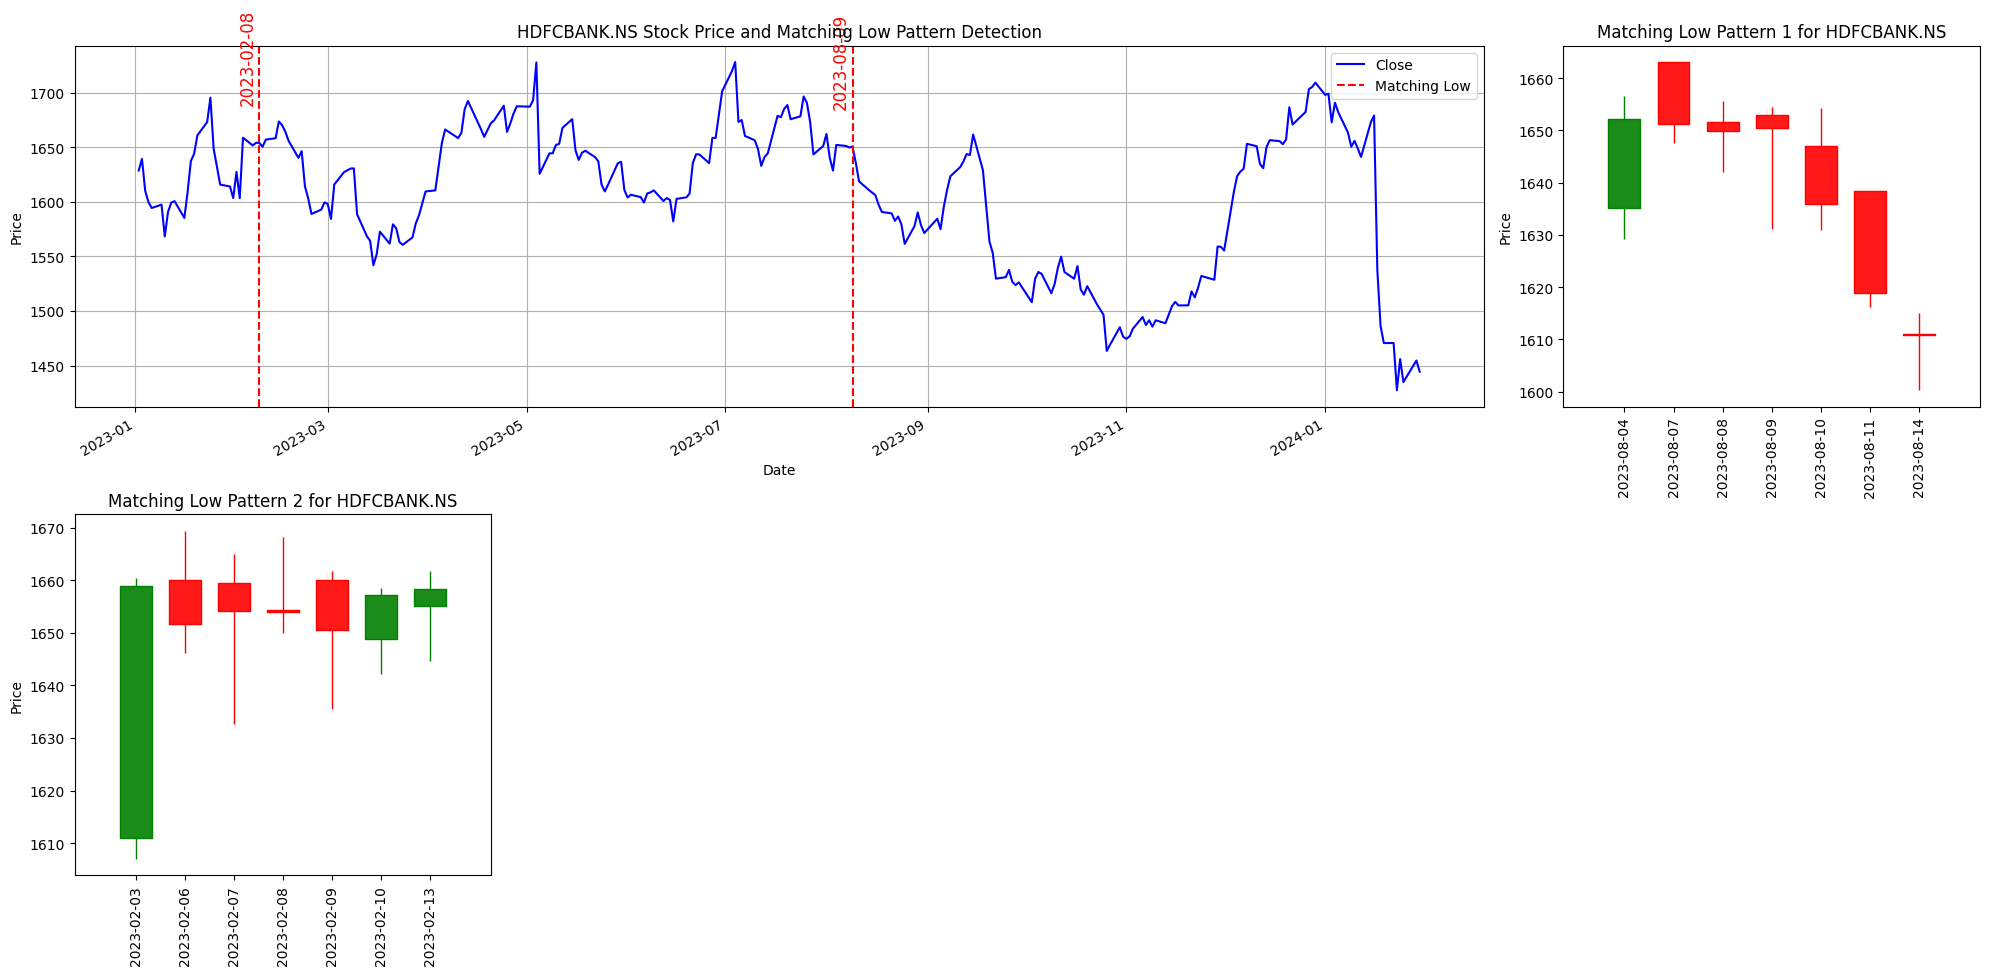

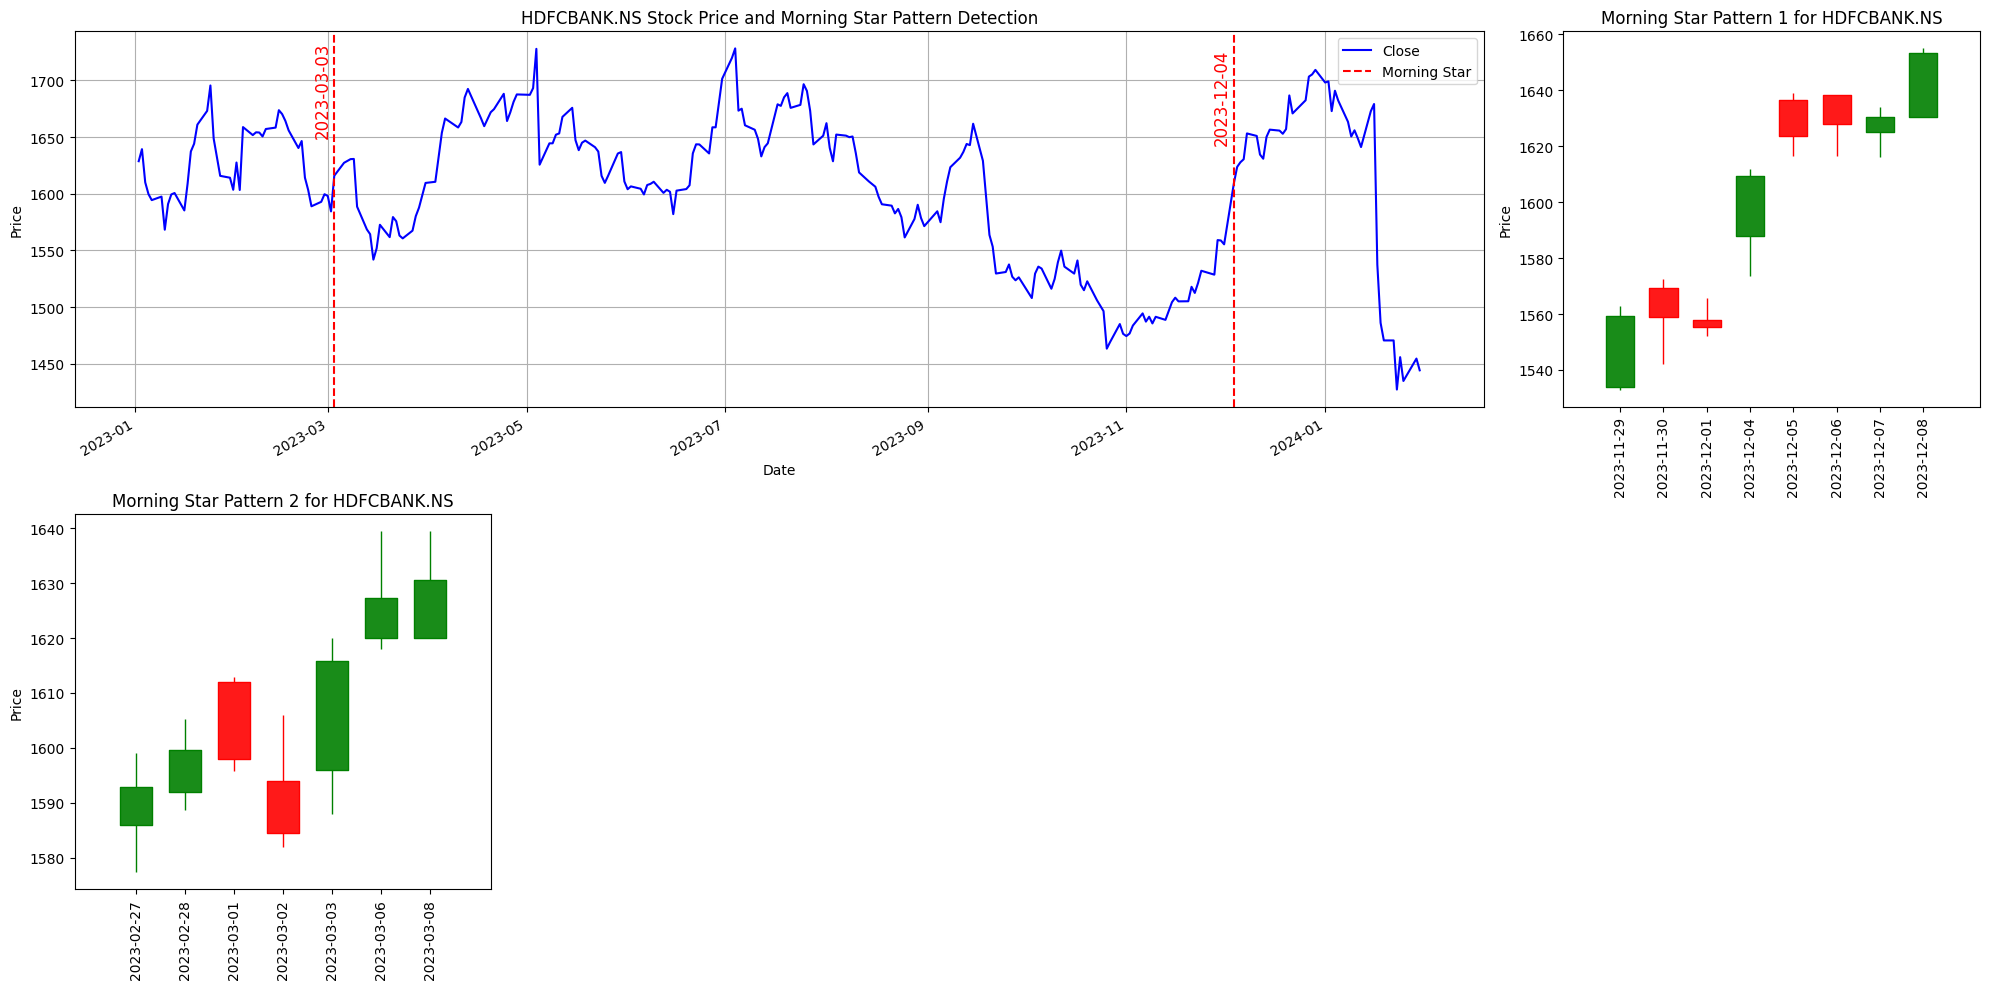

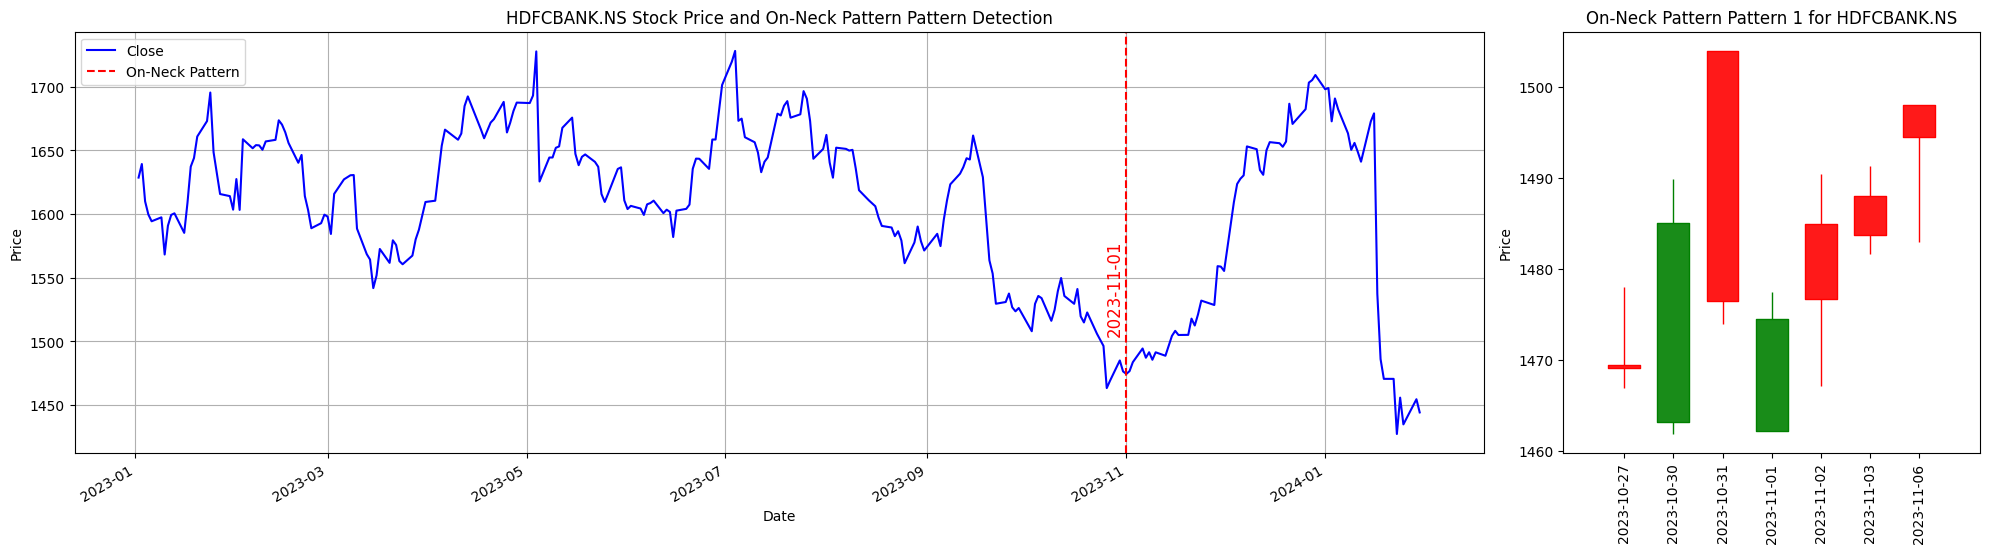

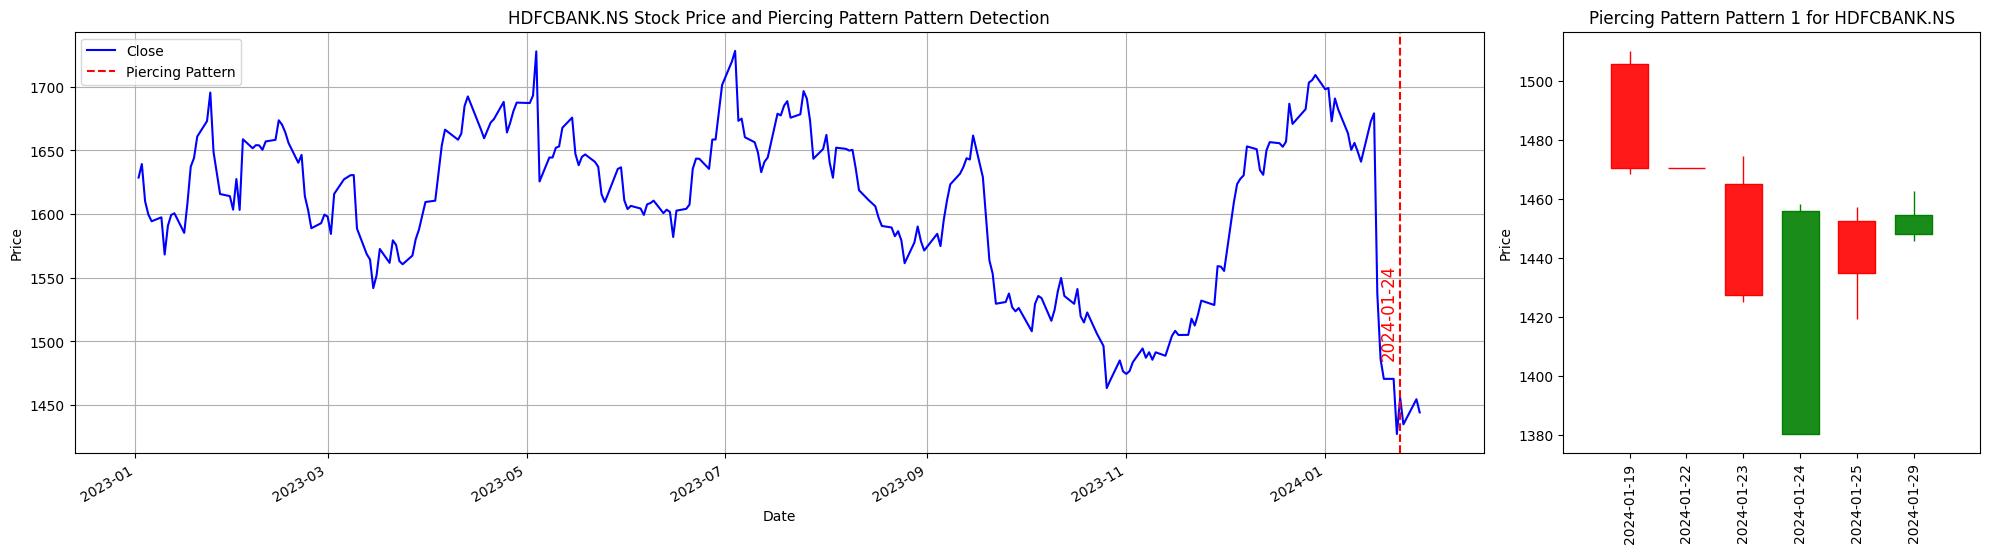

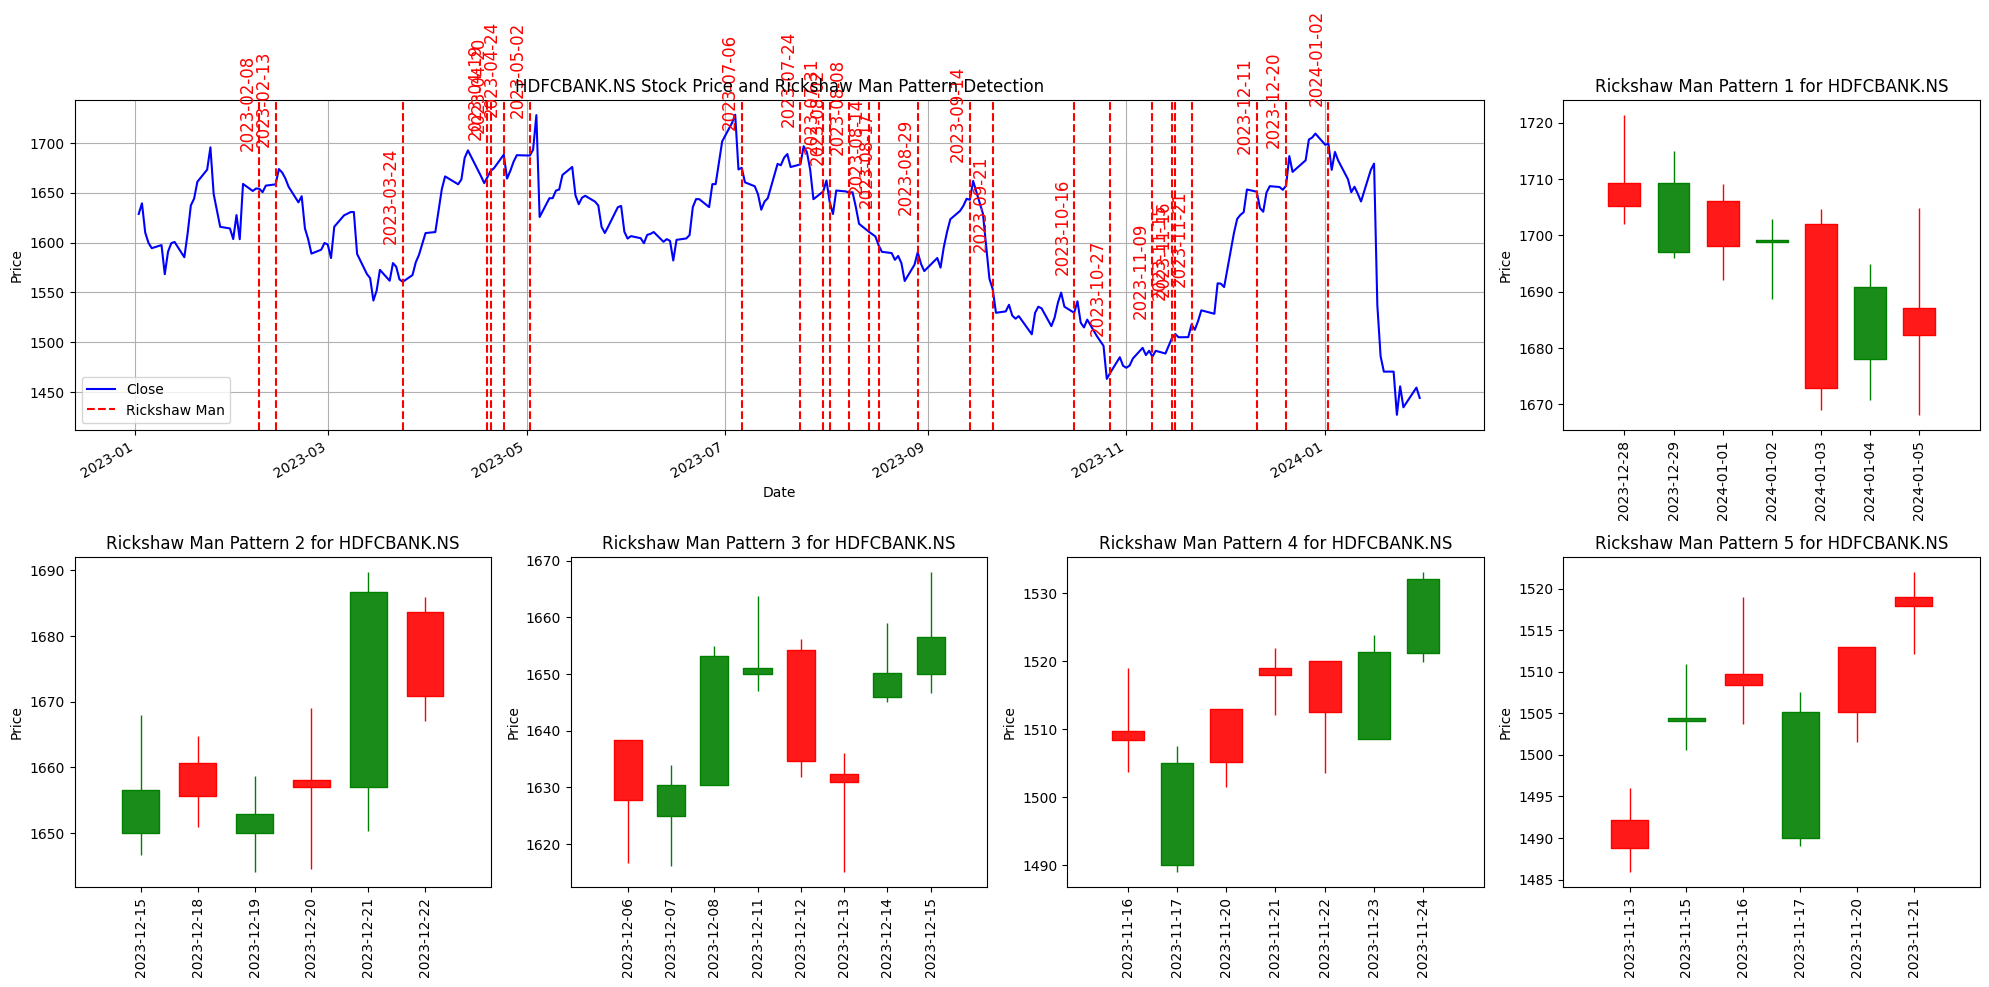

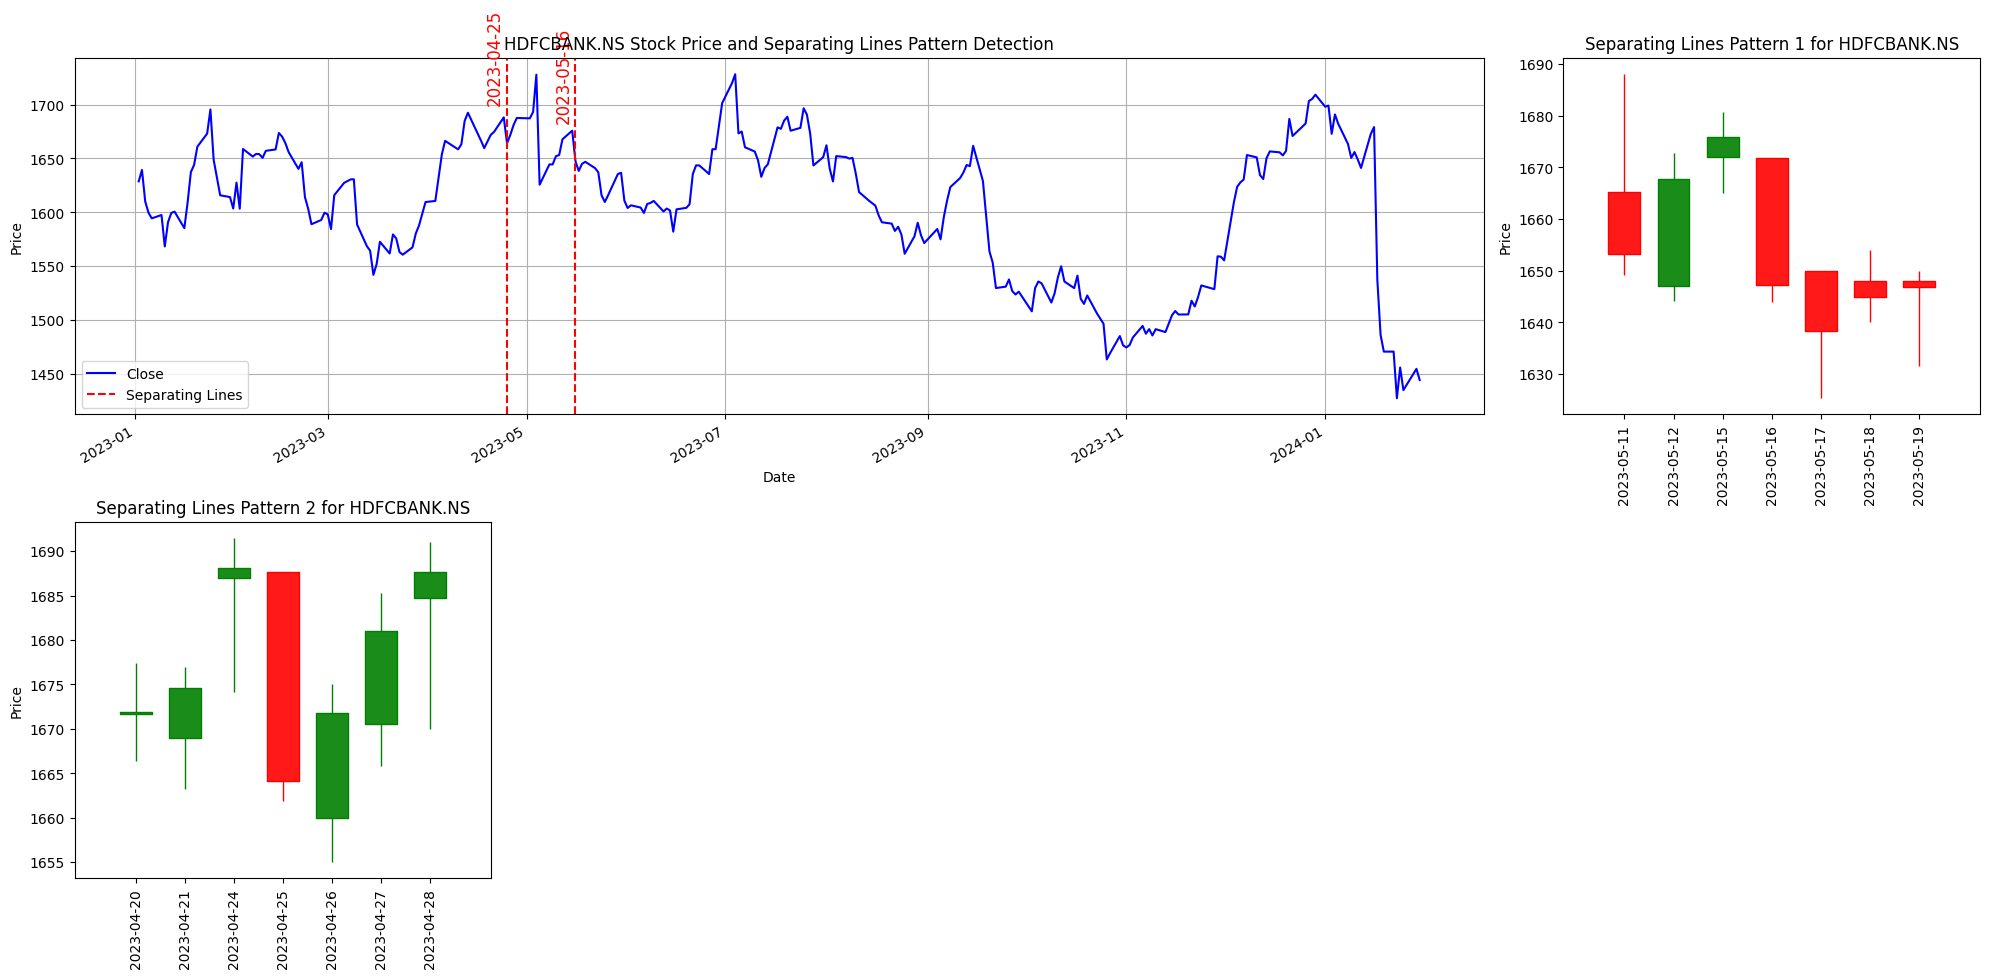

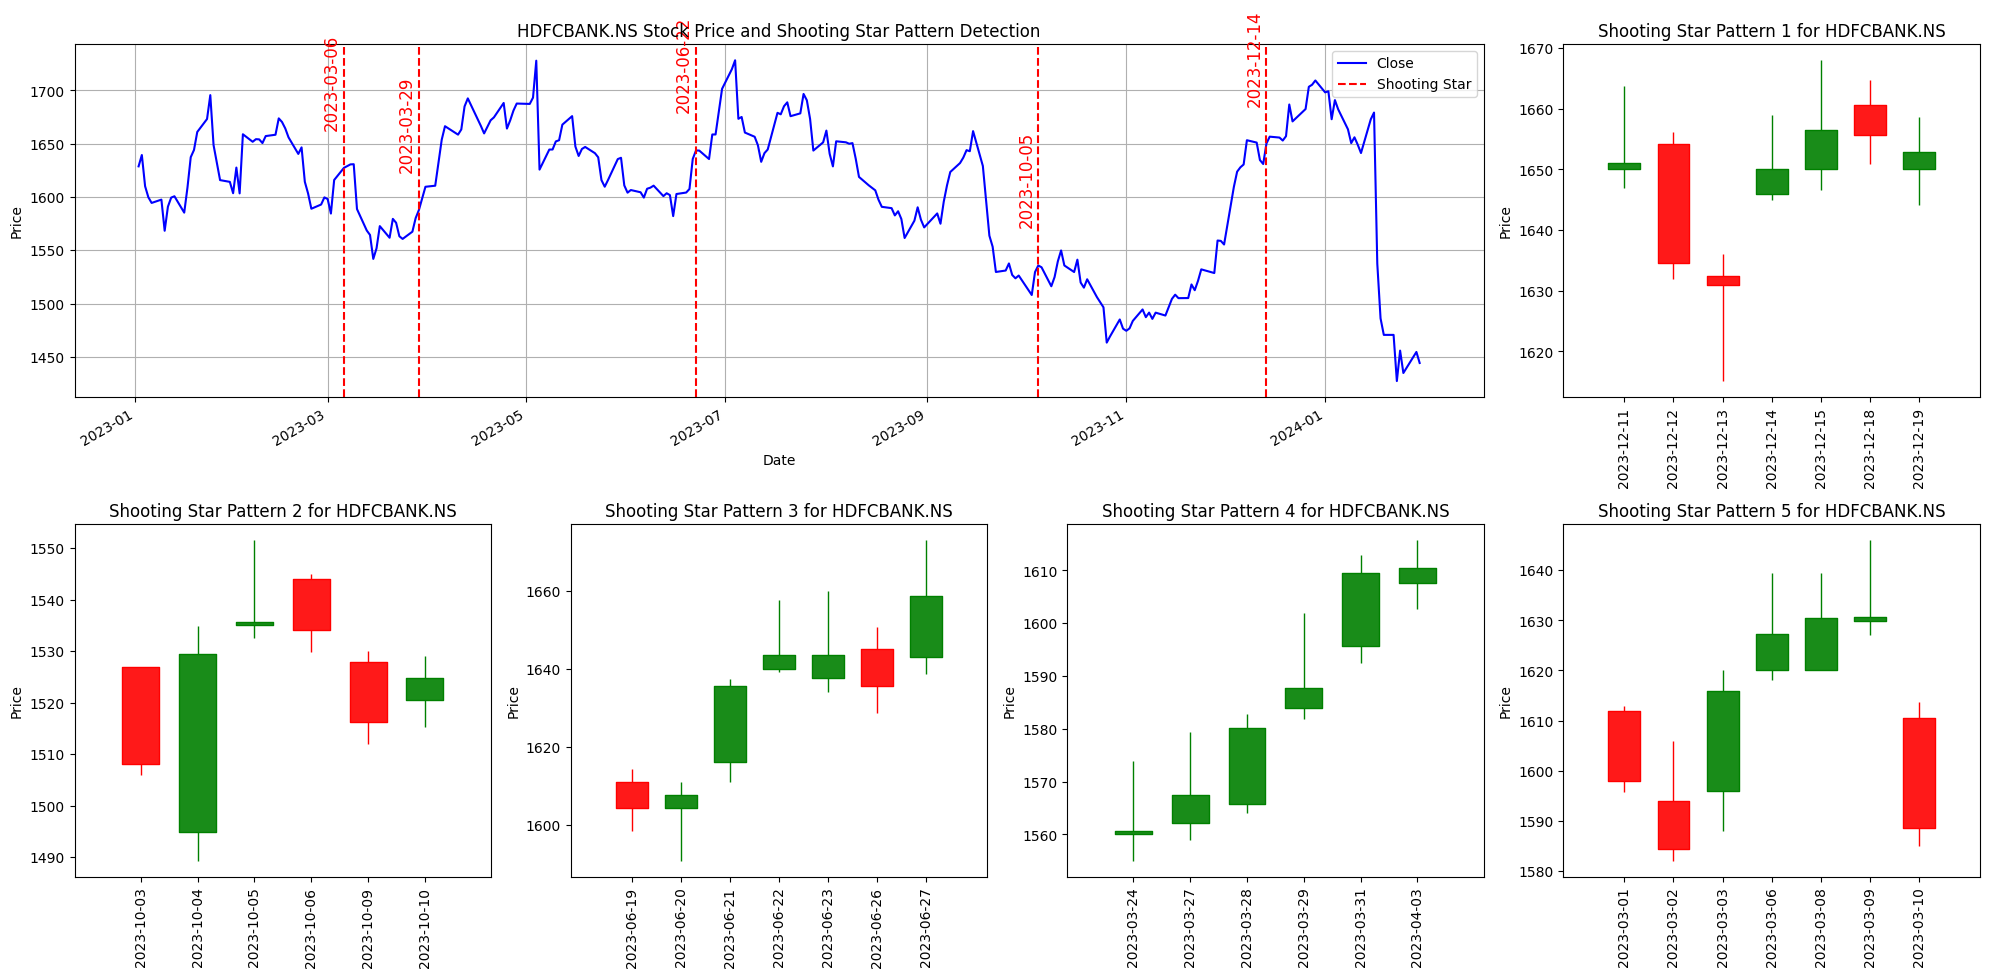

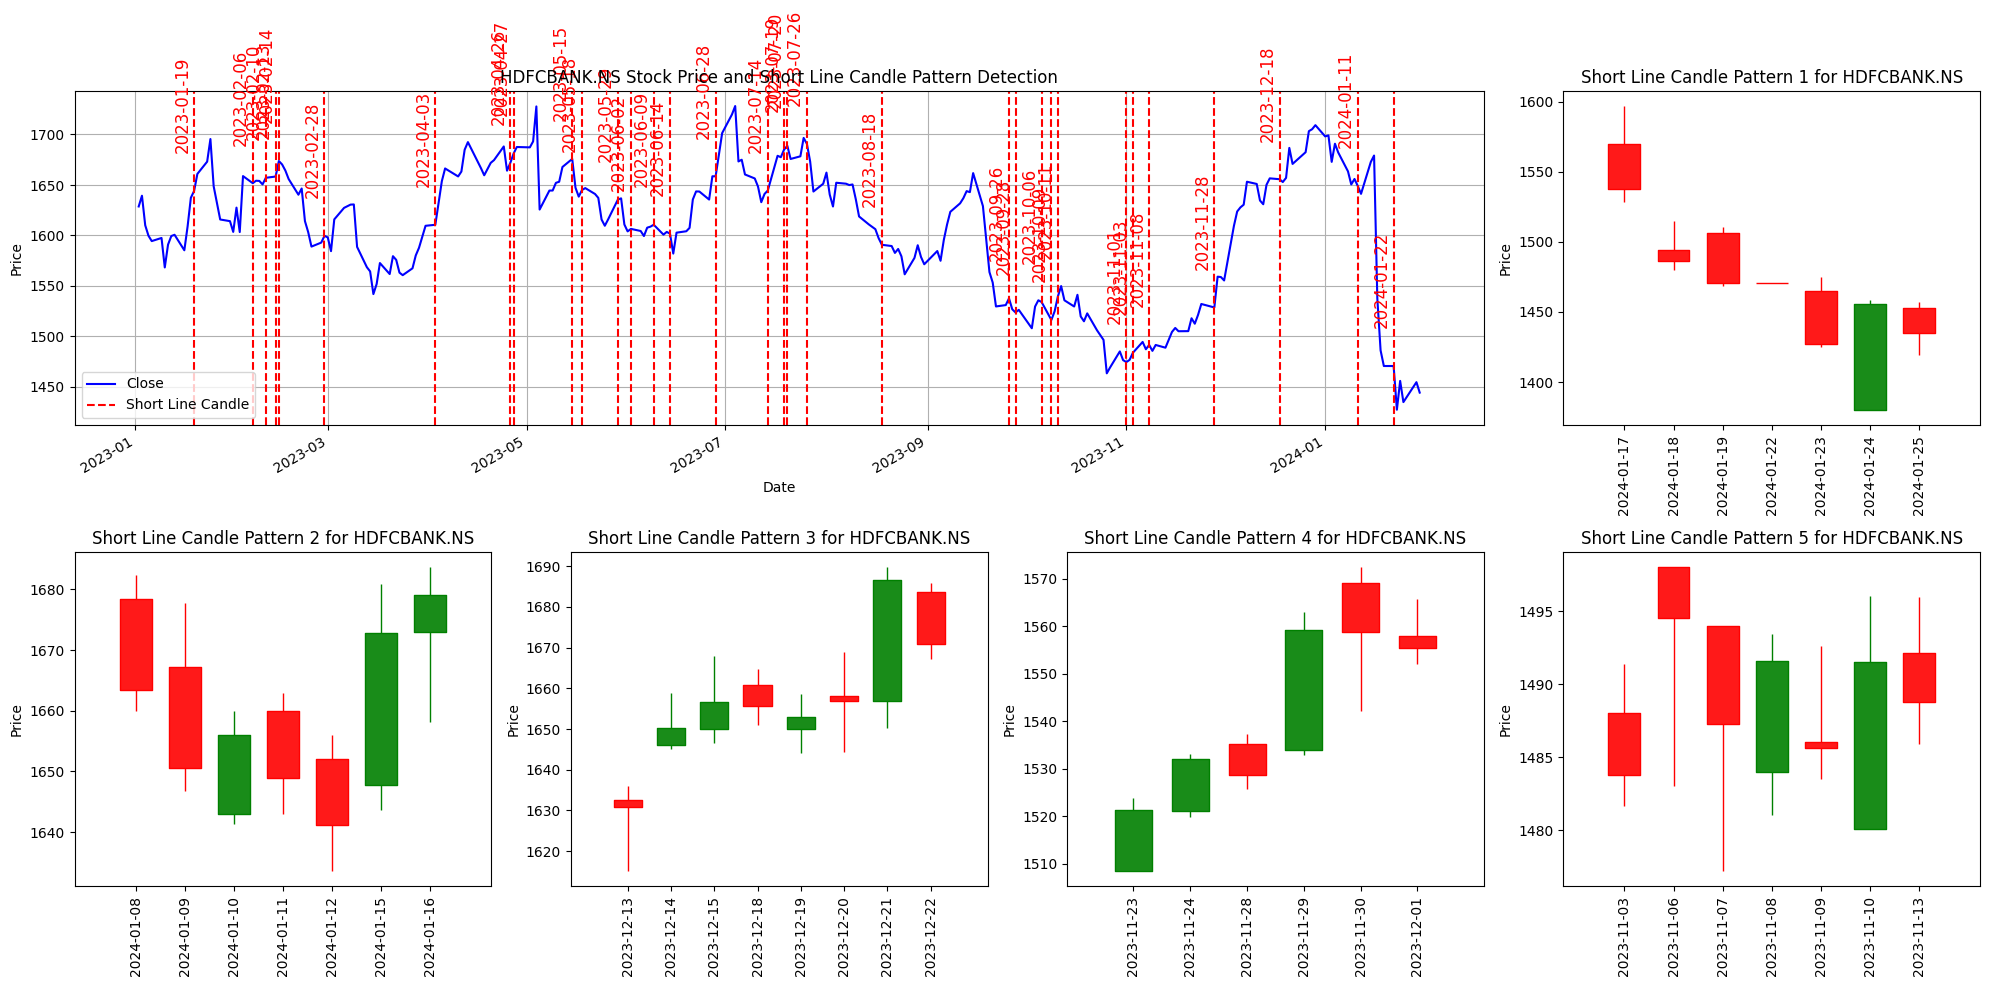

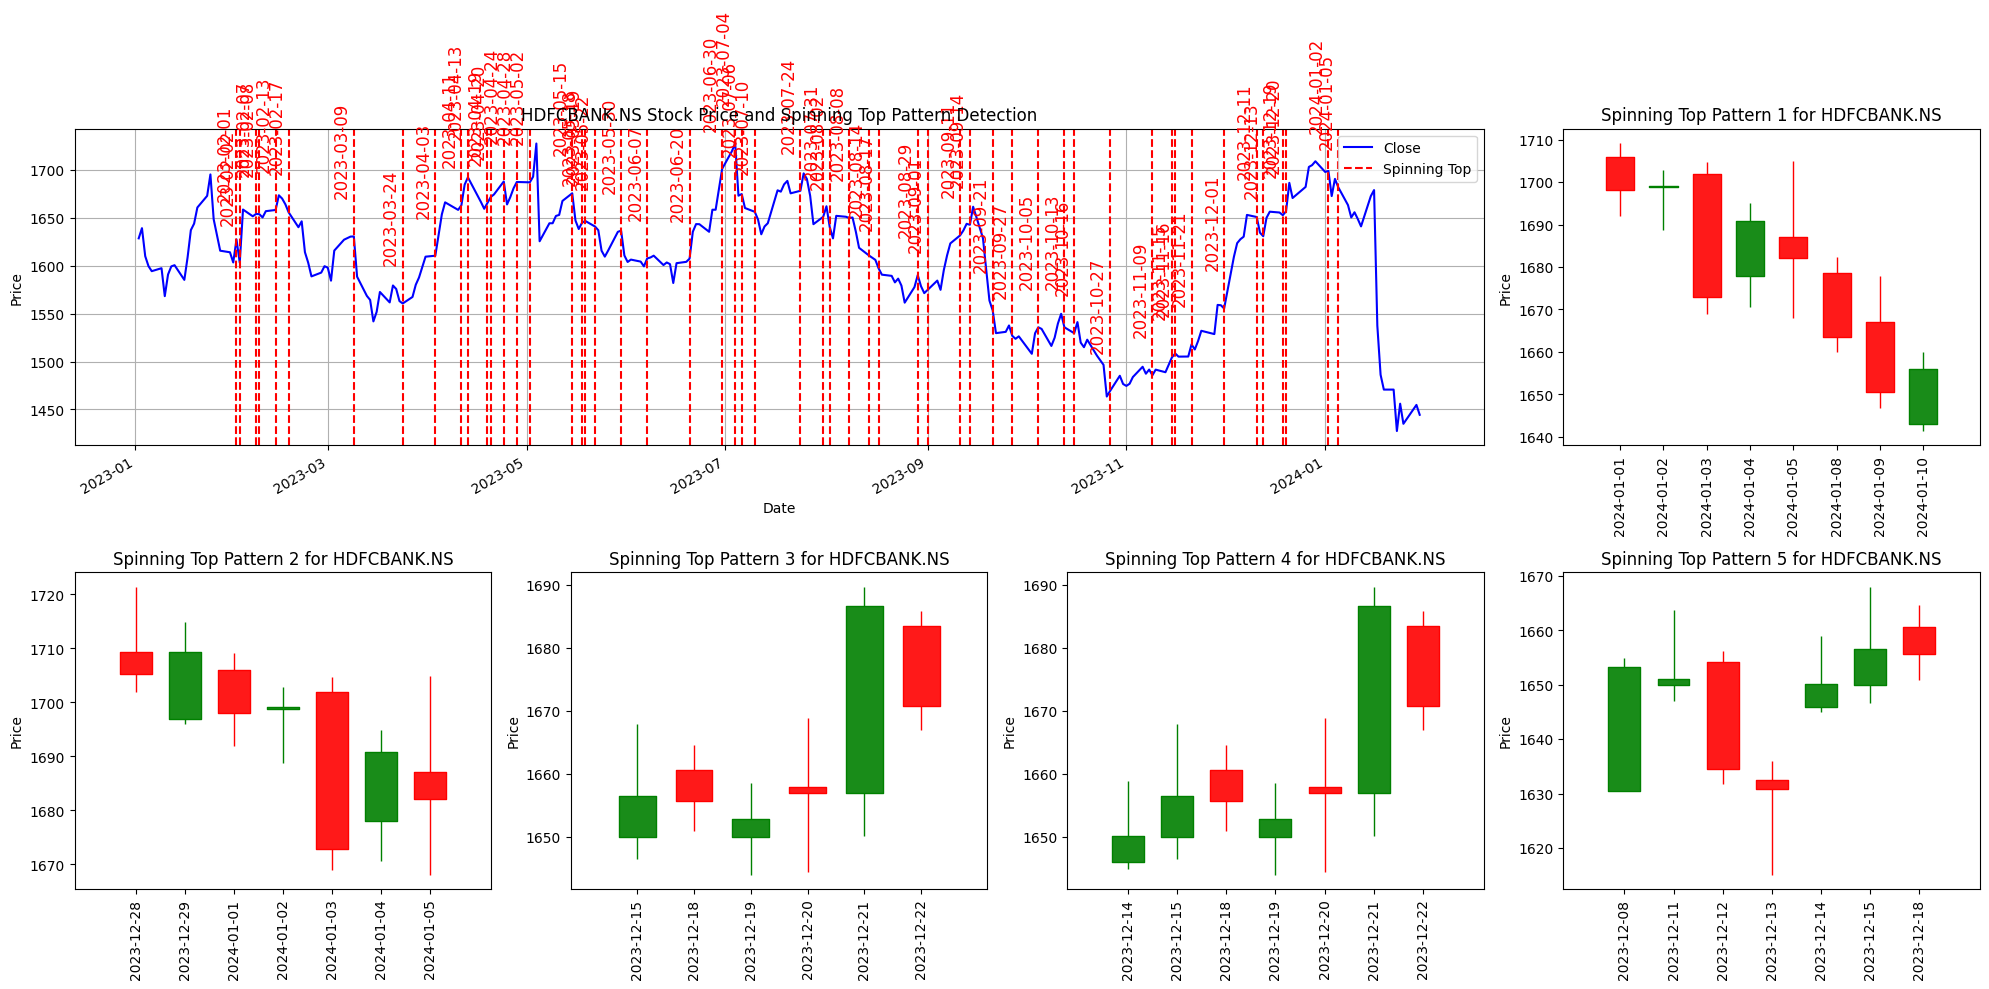

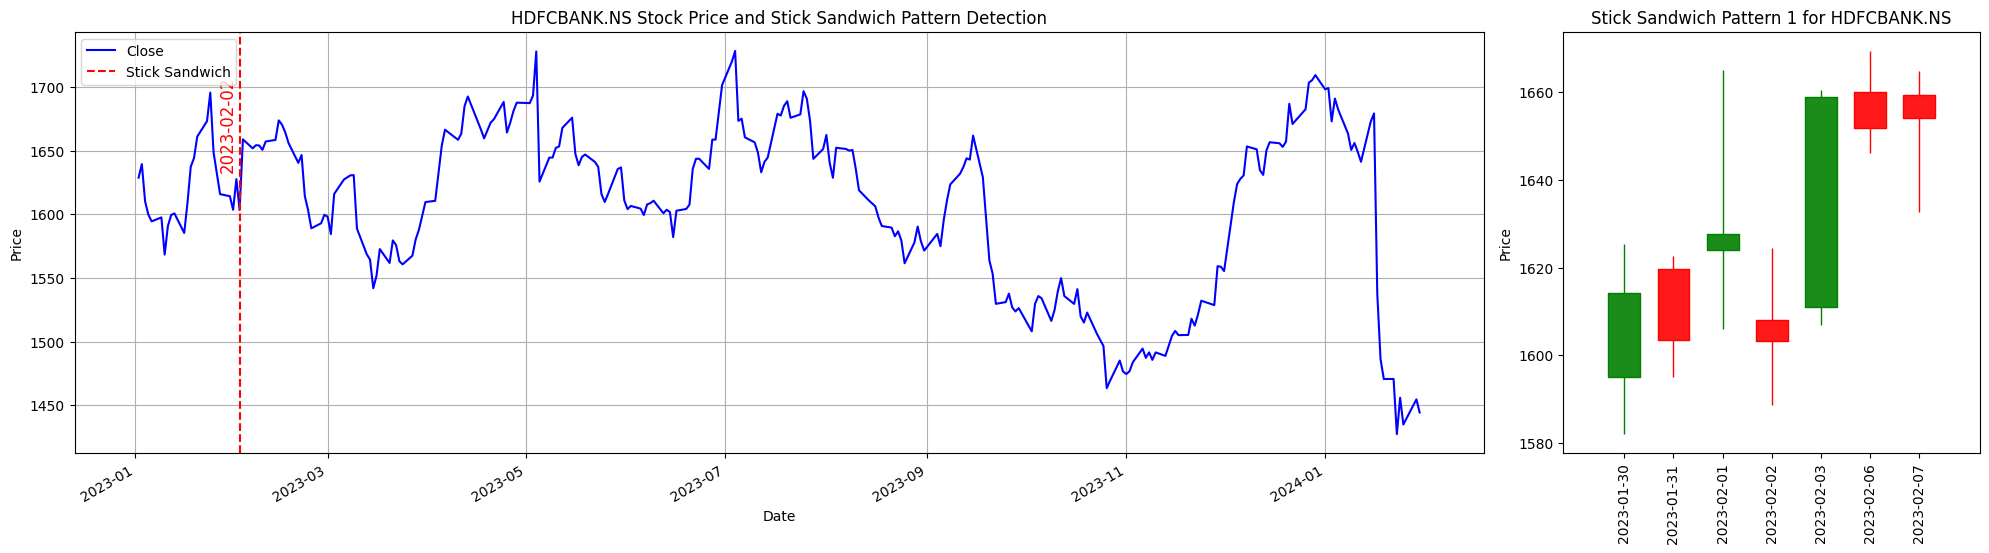

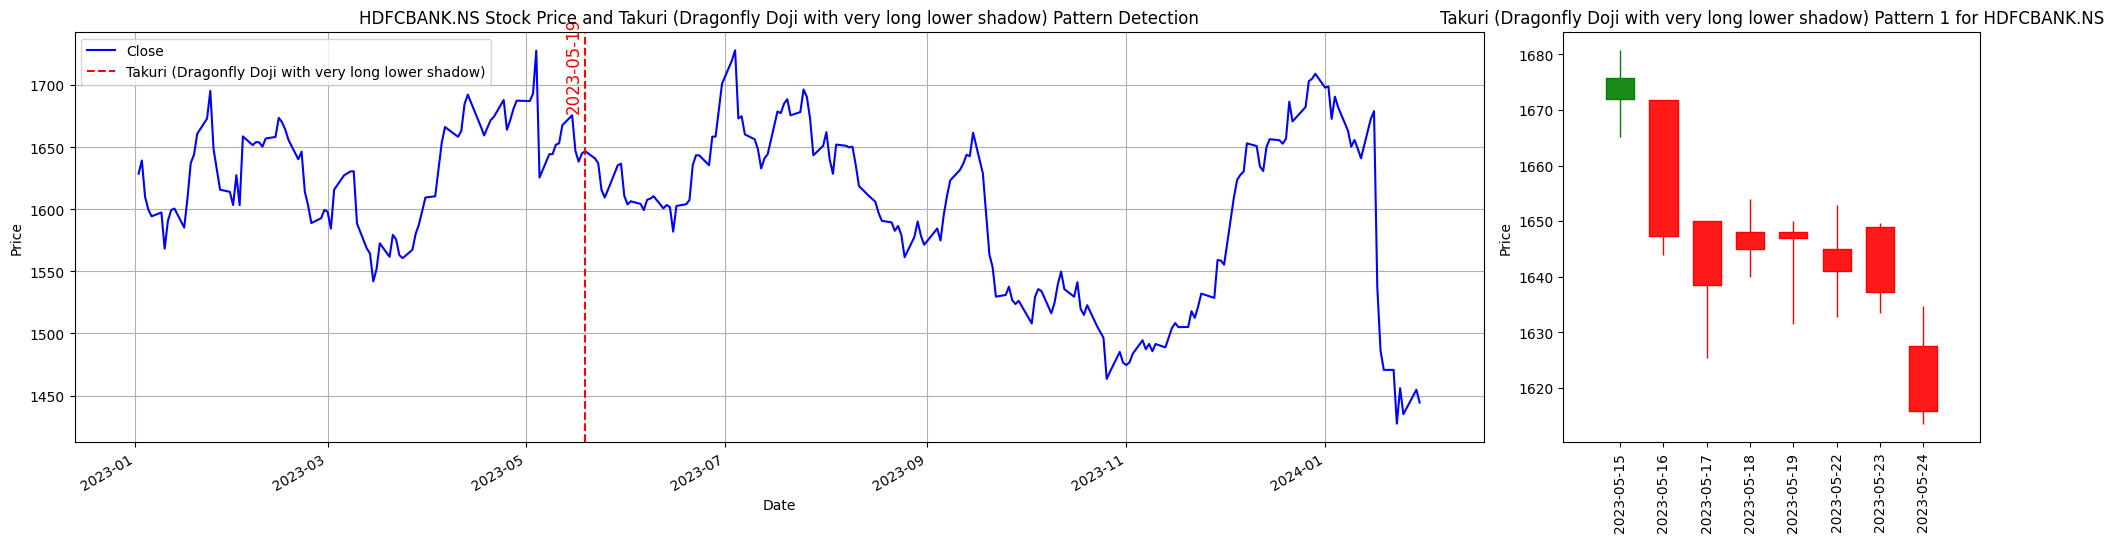

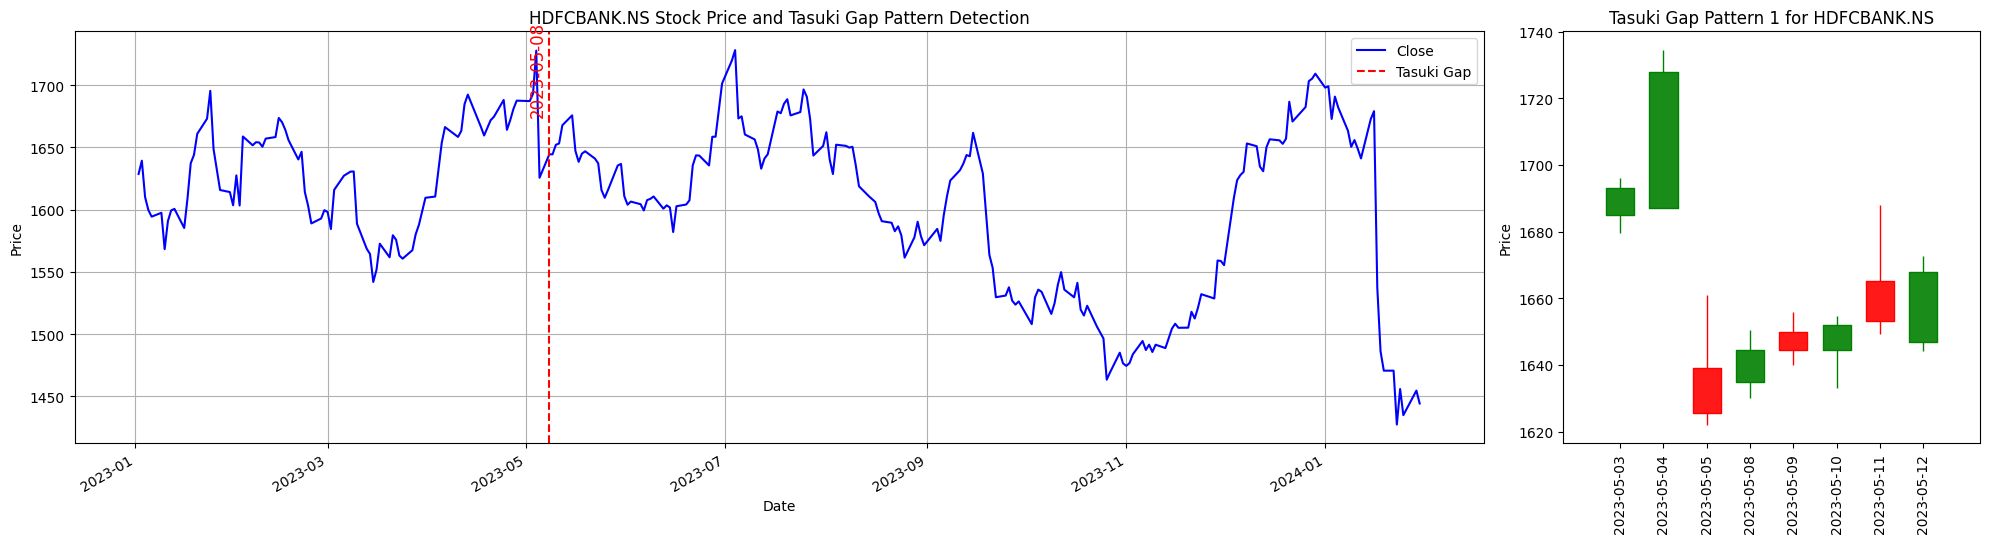

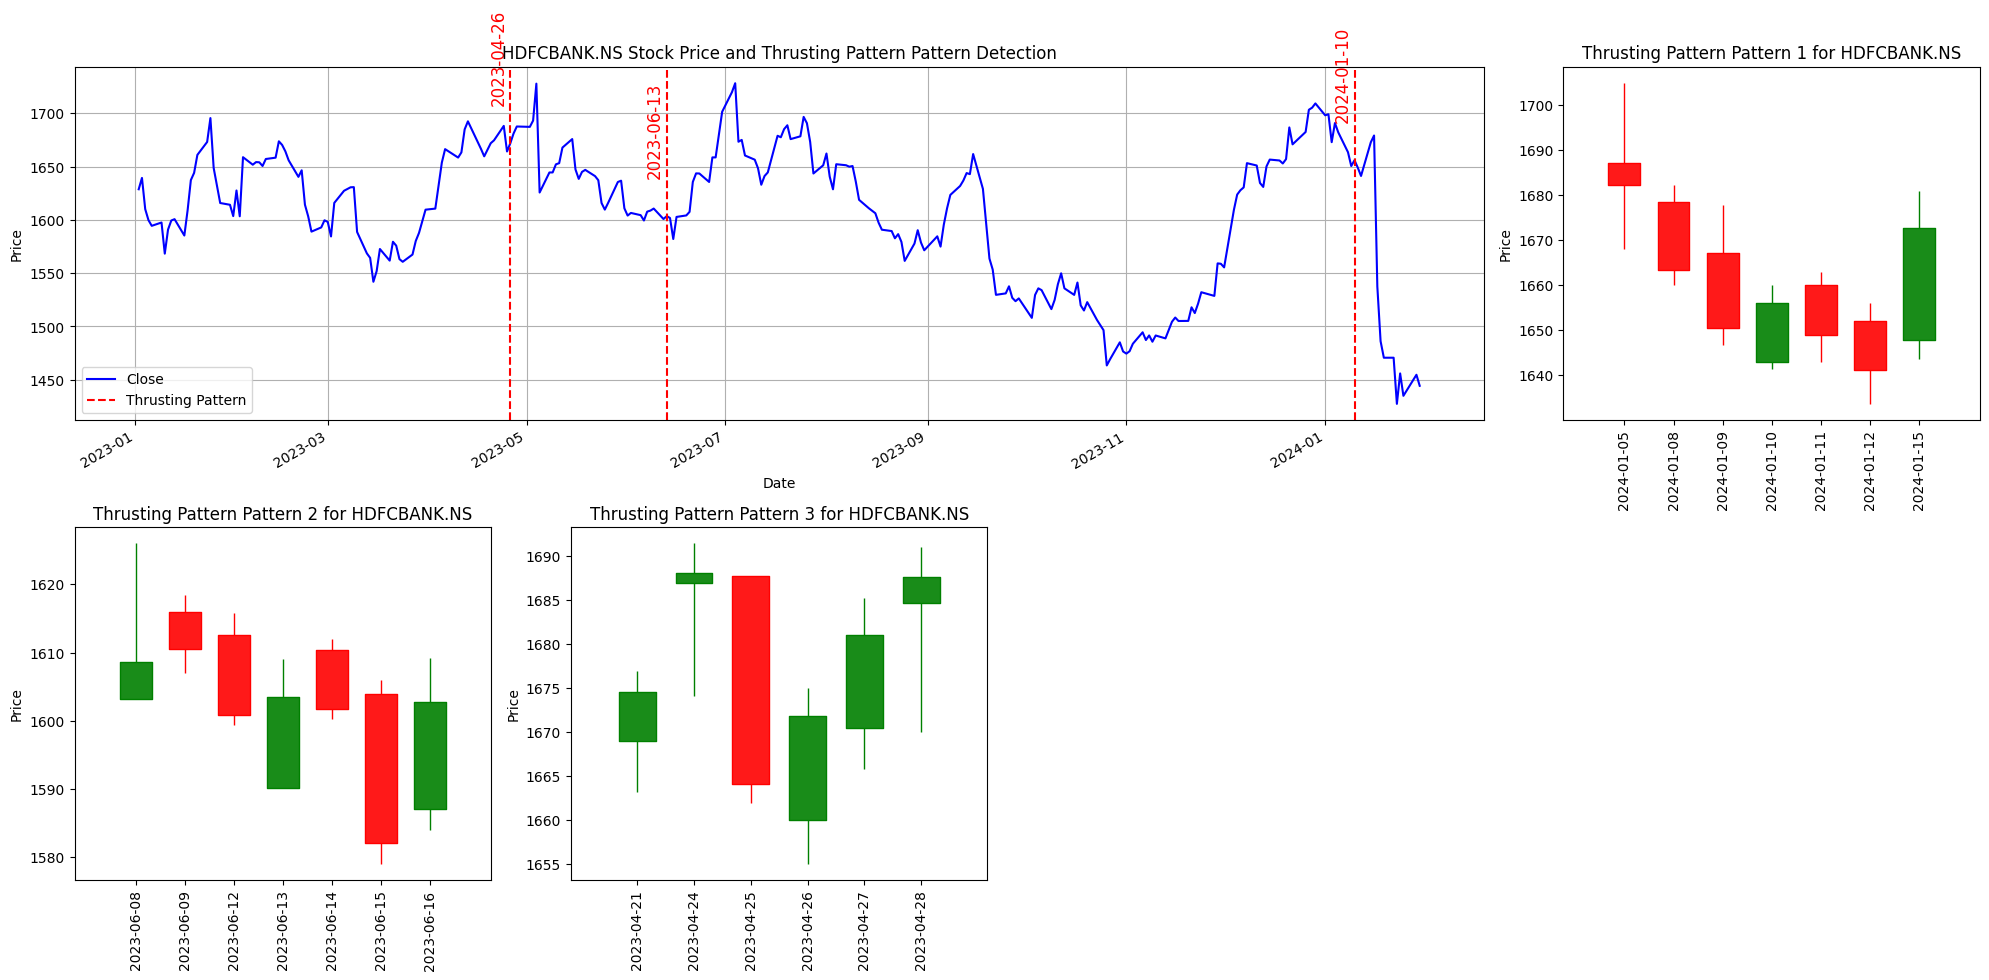

In [4]:
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
import matplotlib.gridspec as gridspec

# Retrieve data from yfinance
symbol = "HDFCBANK.NS"
data = yf.download(symbol, start="2023-01-01", end="2024-01-31")

for pattern_name, pattern_func in pattern_funcs:
    data[pattern_name] = pattern_func(data['Open'], data['High'], data['Low'], data['Close'])
    pattern_dates = data[data[pattern_name] != 0].index

    # Skip if there are no detected patterns of this type
    if len(pattern_dates) == 0:
        continue

    fig = plt.figure(figsize=(20, 10))
    gs = gridspec.GridSpec(2, 4)

    mc = mpf.make_marketcolors(up='g', down='r', inherit=True)
    custom_style = mpf.make_mpf_style(marketcolors=mc)

    ax1 = plt.subplot(gs[0, :3])
    data[['Close']].plot(ax=ax1, color='blue')
    for date in pattern_dates:
        ax1.axvline(date, color='red', linestyle='--', label=pattern_name if pattern_name not in [l.get_label() for l in ax1.lines] else "")
        ax1.annotate(date.strftime('%Y-%m-%d'), (date, data['Close'].loc[date]), xytext=(-15,10+20),
                     textcoords='offset points', color='red', fontsize=12, rotation=90)

    window = 5  # Days before and after the pattern
    for i in range(5):
        if len(pattern_dates) > i:
            pattern_date = pattern_dates[-(i+1)]

            start_date = pattern_date - pd.Timedelta(days=window)
            end_date = min(data.index[-1], pattern_date + pd.Timedelta(days=window))
            valid_dates = pd.date_range(start=start_date, end=end_date).intersection(data.index)

            subset = data.loc[valid_dates]

            if i == 0:
                ax = plt.subplot(gs[0, 3])
            else:
                ax = plt.subplot(gs[1, i-1])

            mpf.plot(subset, type='candle', ax=ax, volume=False, show_nontrading=False, style=custom_style)
            ax.set_title(f'{pattern_name} Pattern {i+1} for {symbol}')

            x_ticks = list(range(0, len(valid_dates), 1))
            x_labels = [date.strftime('%Y-%m-%d') for date in valid_dates]
            ax.set_xticks(x_ticks)
            ax.set_xticklabels(x_labels, rotation=90)

    ax1.set_title(f"{symbol} Stock Price and {pattern_name} Pattern Detection")
    ax1.legend(loc='best')
    ax1.grid(True)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Price")
    plt.tight_layout()
    plt.show()